# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.functions_ver1_draft import *
from modules.default_params_ver1 import *

plt.rcParams["figure.dpi"] = 150

# assign params

In [2]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

In [4]:
# know that f_cut = 20, find mcz
eta = lens_params["eta"]
f_cut = 20
mcz = (eta ** (3 / 5)) / (6 ** (3 / 2) * np.pi * f_cut)
print(mcz / solar_mass)

95.68450797230713


In [5]:
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    print("Delta_td = {:.3g}".format(Delta_td))

Delta_td = 0.00988
Delta_td = 0.0198
Delta_td = 0.0296


In [6]:
lens_params = lens_params_1.copy()
lens_inst = LensingGeo(lens_params)
f_cut = lens_inst.f_cut()
print(f_cut)
Delta_td = lens_inst.Delta_td()
print(1 / Delta_td)

95.68450797230712
50.617127960944714


In [7]:
# create y_range and MLz_range based on the same time delay
y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

print(MLz_range)

[ 214.46330697  284.55075023  395.16355656  588.48044383 1000.13935562
 2511.51019443]


# test PyCBC's `optimized_match` and `match` functions

## `AssertionError`

In [42]:
NP_params["mcz"] = 51 * solar_mass
lens_params["mcz"] = 50 * solar_mass

vec1 = get_gw(NP_params)["waveform"]
print("Delta_t and Delta_f for vec1:", vec1.delta_t, vec1.delta_f)
print("Length of vec1:", len(vec1))

vec2 = get_gw(lens_params)["waveform"]
print("Delta_t and Delta_f for vec2:", vec2.delta_t, vec2.delta_f)
print("Length of vec2:", len(vec2))

NP_inst = Precessing(NP_params)
# f_range = np.arange(20, NP_inst.f_cut(), 0.25)
f_range = get_gw(lens_params)["f_range"]
# f_range_updated = np.pad(vec1, (0, len(vec2) - len(vec1)), 'constant', constant_values=np.nan)
vec1 = NP_inst.strain(f_range)
print("Length of vec1:", len(vec1))
# print(vec1)

# if len(vec1) < len(vec2): add nans to vec1, else, truncate vec1 so that they are the same length
# if len(vec1) < len(vec2):
#     # vec1 = np.pad(vec1, (0, len(vec2) - len(vec1)), 'constant', constant_values=np.nan)
#     vec1.resize(len(vec2))
# else:
#     vec1 = vec1[:len(vec2)]

# vec1.resize(len(vec2))

print("PyCBC simple matching between htilde and stilde:", match(vec1, vec2))
# print("My optimized matching between htilde and stilde:", my_optimized_match(vec1, vec2))
print(
    "PyCBC optimized matching between htilde and stilde:", optimized_match(vec1, vec2)
)

Delta_t and Delta_f for vec1: 0.02857142857142857 0.25
Length of vec1: 71
Delta_t and Delta_f for vec2: 0.0273972602739726 0.25
Length of vec2: 74
Length of vec1: 74
PyCBC simple matching between htilde and stilde: (0.9339516755735774, 0)
My optimized matching between htilde and stilde: (0.9339608068010081, -0.006469289971407012)
PyCBC optimized matching between htilde and stilde: (0.9339608068010081, -0.006469289971407012)


In [43]:
NP_params["mcz"] = 51 * solar_mass
lens_params["mcz"] = 50 * solar_mass

vec1 = get_gw(NP_params)["waveform"]
print("Delta_t and Delta_f for vec1:", vec1.delta_t, vec1.delta_f)
print("Length of vec1:", len(vec1))

vec2 = get_gw(lens_params)["waveform"]
print("Delta_t and Delta_f for vec2:", vec2.delta_t, vec2.delta_f)
print("Length of vec2:", len(vec2))

vec1.resize(len(vec2))
print("Length of vec1:", len(vec1))

print("PyCBC simple matching between htilde and stilde:", match(vec1, vec2))
# print("My optimized matching between htilde and stilde:", my_optimized_match(vec1, vec2))
print(
    "PyCBC optimized matching between htilde and stilde:", optimized_match(vec1, vec2)
)

Delta_t and Delta_f for vec1: 0.02857142857142857 0.25
Length of vec1: 71
Delta_t and Delta_f for vec2: 0.0273972602739726 0.25
Length of vec2: 74
Length of vec1: 74
PyCBC simple matching between htilde and stilde: (0.9385317004870225, 0)
My optimized matching between htilde and stilde: (0.9385885059293985, -0.016235134603461845)
PyCBC optimized matching between htilde and stilde: (0.9385885059293985, -0.016235134603461845)


## $\mathcal{M}_{\text{s}}$ and $f_{\rm cut}$

In [103]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)


def get_fcut_from_mcz(mcz):
    lens_params["mcz"] = mcz * solar_mass
    inst = LensingGeo(lens_params)
    f_cut = inst.f_cut()
    return f_cut

Text(0, 0.5, '$f_{\\text{cut}}$ [Hz]')

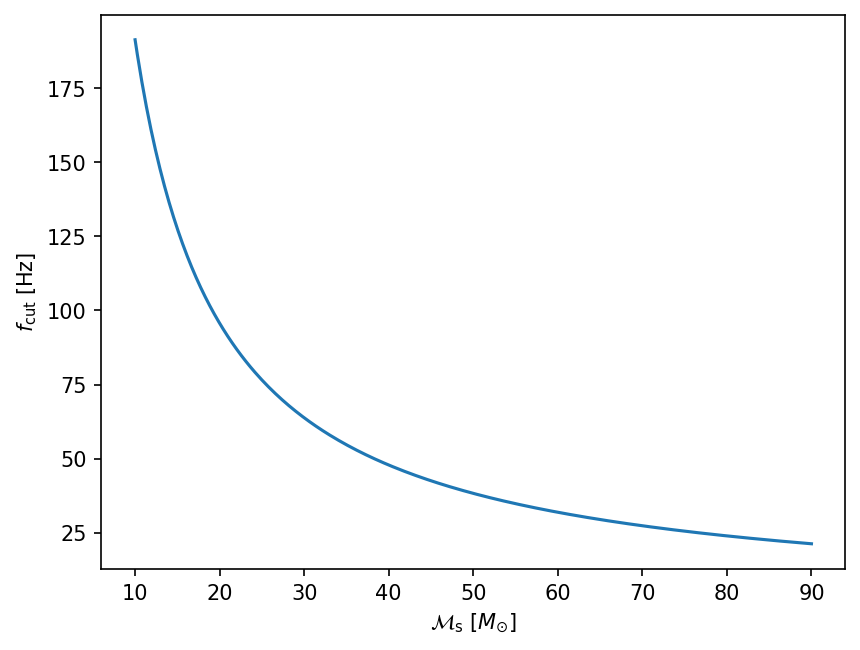

In [105]:
mcz_L_arr = np.linspace(10, 90, 300)
f_cut_arr = np.array([get_fcut_from_mcz(mcz) for mcz in mcz_L_arr])

plt.plot(mcz_L_arr, f_cut_arr)
plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
plt.ylabel(r"$f_{\text{cut}}$ [Hz]")

## psd

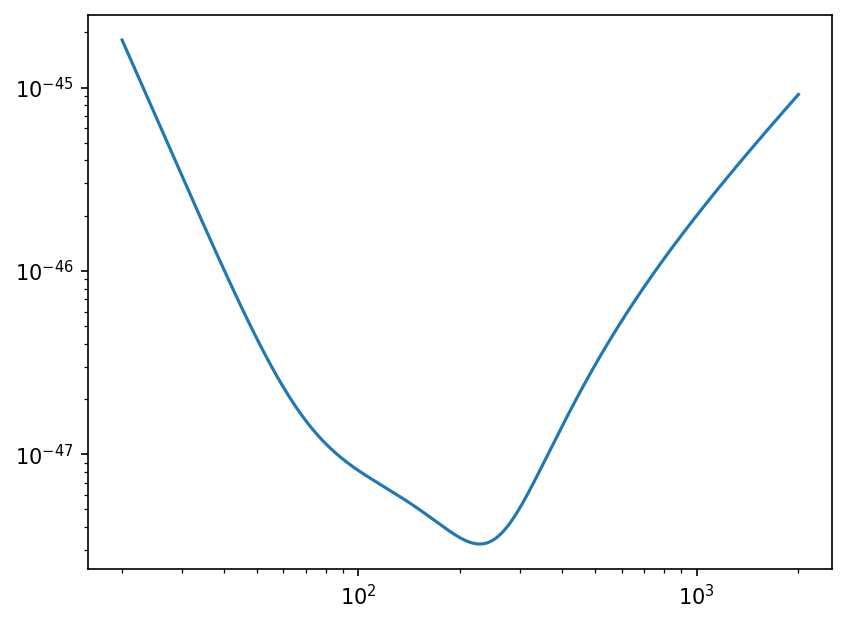

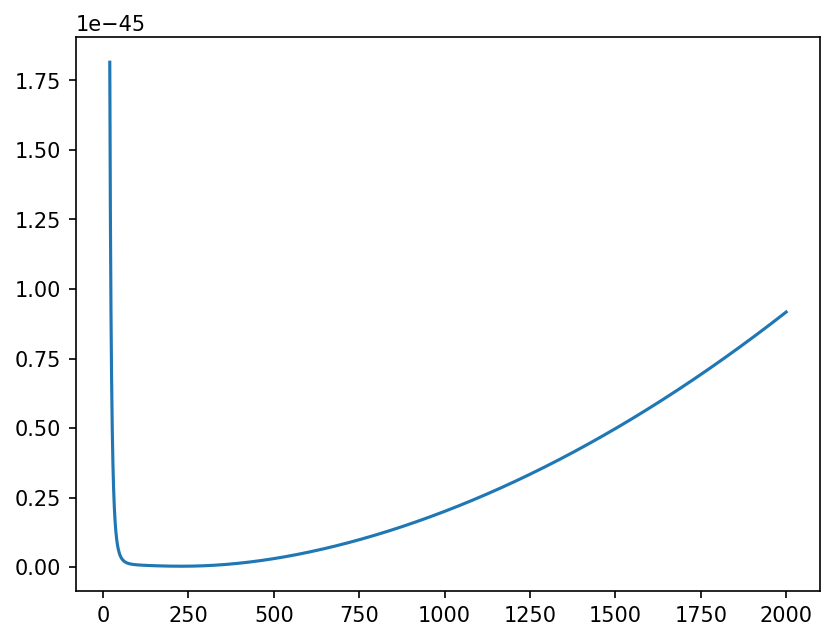

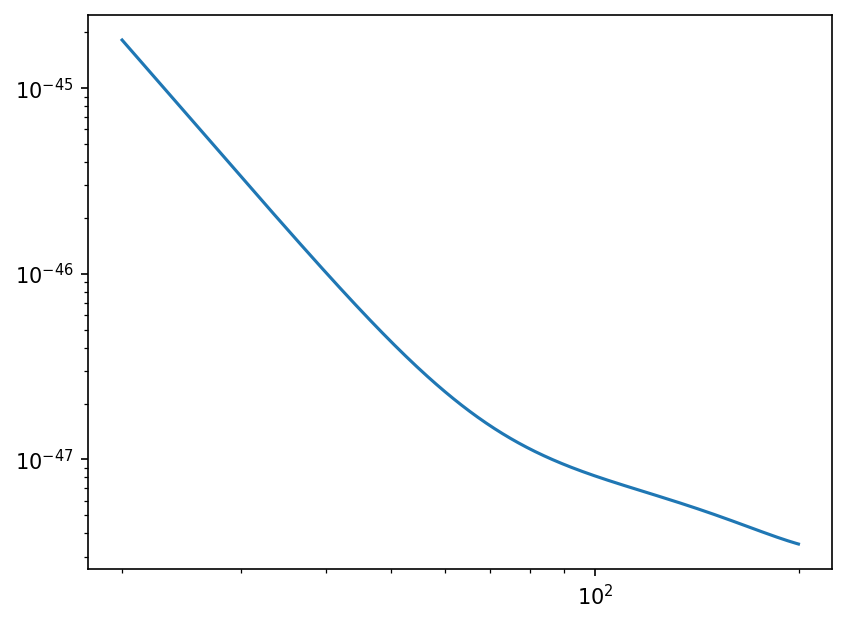

In [4]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

f_range = np.arange(20, 2000, 0.25)
f_range_short = np.arange(20, 200, 0.25)

plt.loglog(f_range, Sn(f_range))
plt.show()
plt.plot(f_range, Sn(f_range))
plt.show()
plt.loglog(f_range_short, Sn(f_range_short))
plt.show()

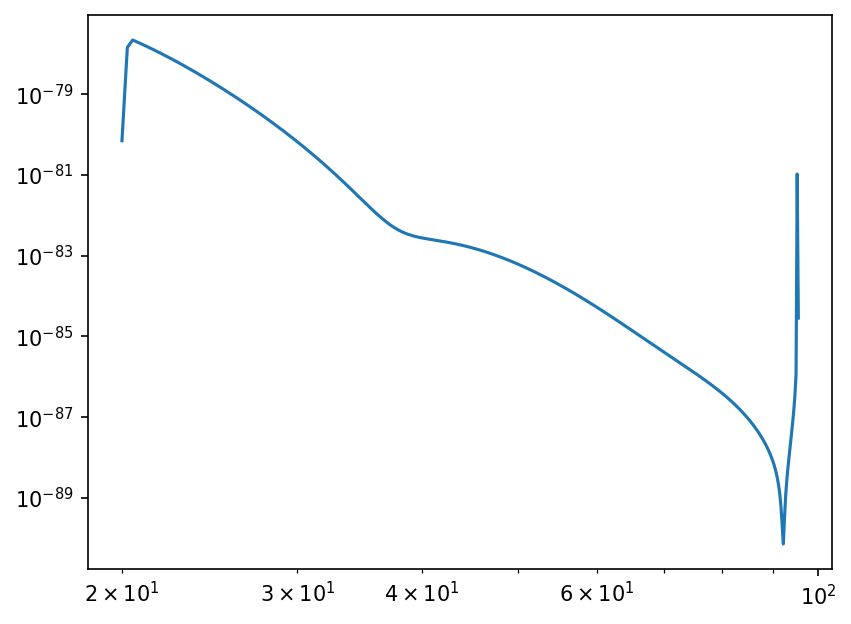

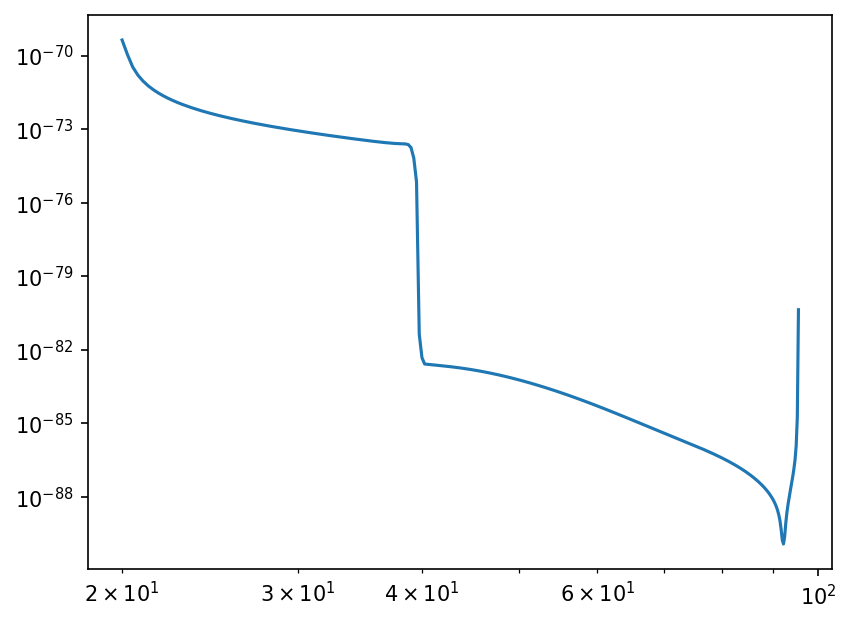

In [8]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)["waveform"]
ts_L = h_L.to_timeseries()
f_range = get_gw(lens_params)["f_range"]

plt.loglog(f_range, ts_L.psd(4.0))
plt.show()
plt.loglog(f_range, ts_L.filter_psd(4.0, 0.25, 20))
plt.show()

In [62]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)["waveform"]
f_range = get_gw(lens_params)["f_range"]
h_RP = get_gw(RP_params)["waveform"]

print(optimized_match(h_L, h_RP))
print(optimized_match(h_L, h_RP, Sn(f_range)))
print(match(h_L, h_RP))
print(match(h_L, h_RP, Sn(f_range)))

(0.9266115164499805, -0.1288189359895544)
(0.8758932026243175, 0.3001817432526496)
(0.9225082854084654, 0)
(0.8634315232578901, 0)


In [54]:
f_range = np.arange(20, 100, 0.25)
Sn_val = np.zeros_like(f_range)
f_min = 20
for i in range(len(f_range)):
    if f_range[i] < f_min:
        Sn_val[i] = np.inf
    else:
        S0 = 1e-49
        f0 = 215
        Sn_temp = (
            np.power(f_range[i] / f0, -4.14)
            - 5 * np.power(f_range[i] / f0, -2)
            + 111
            * (
                (1 - np.power(f_range[i] / f0, 2) + 0.5 * np.power(f_range[i] / f0, 4))
                / (1 + 0.5 * np.power(f_range[i] / f0, 2))
            )
        )
        Sn_val[i] = Sn_temp * S0

if True:
    Sn_series = FrequencySeries(Sn_val, delta_f=0.25)

print(type(Sn_series))
print(type(Sn_val))
print(Sn_series - Sn_val)

<class 'pycbc.types.frequencyseries.FrequencySeries'>
<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

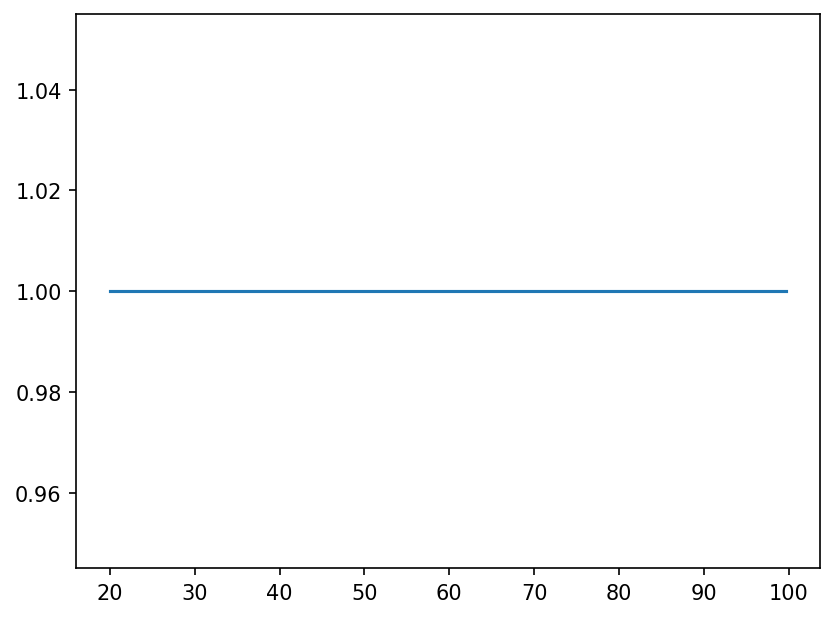

In [60]:
psd_n = np.ones_like(f_range)
psd_n = FrequencySeries(psd_n, delta_f=0.25)

plt.plot(f_range, psd_n)

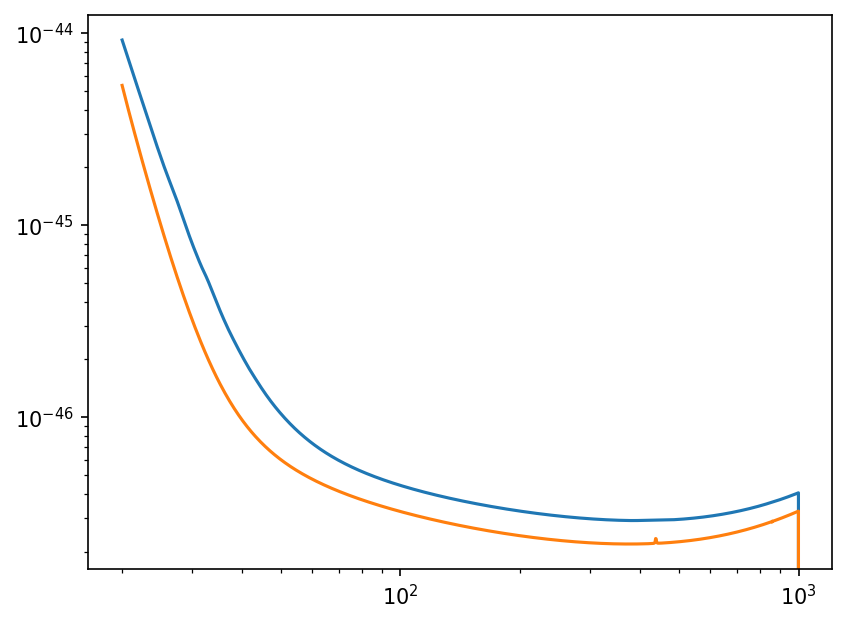

In [93]:
from pycbc.psd.analytical import aLIGOAdVO4IntermediateT1800545, aLIGOAdVO4T1800545

psd1 = aLIGOAdVO4IntermediateT1800545(4000, delta_f=0.25, low_freq_cutoff=20)
psd2 = aLIGOAdVO4T1800545(4000, delta_f=0.25, low_freq_cutoff=20)

f_range = np.arange(0, 1000, 0.25)

plt.loglog(f_range[f_range >= 20], psd1[f_range >= 20])
plt.loglog(f_range[f_range >= 20], psd2[f_range >= 20])

## mismatch between waveforms of different lengths

In [11]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)
lens_params["mcz"] = 19 * solar_mass

print(mismatch("NP & L", lens_params, RP_params, NP_params, use_optimized_match=True))
print(mismatch_general(NP_params, lens_params, use_optimized_match=True))
print(mismatch_general_slice(NP_params, lens_params, use_optimized_match=True))

(0.24646100346490507, 0.39022519876835776, -1.5399739089946614)
{'mismatch': 0.24075936950568844, 'index': 0.004106181164929373, 'phi': -0.9270965133874818}
{'mismatch': 0.22047218703389804, 'index': -0.014157811231221618, 'phi': -0.8969186224620349}


In [12]:
# params2, gw2 are the source parameters and waveform


def Taman_waveform(params1, params2):
    template_inst = Precessing(params1)
    source_inst = LensingGeo(params2)

    f_cut = source_inst.f_cut()
    f_min = 20
    delta_f = 0.25
    f_range = np.arange(f_min, f_cut, delta_f)

    psd_n = Sn(f_range)

    h_template = template_inst.strain(f_range, delta_f=delta_f)
    h_source = source_inst.strain(f_range, delta_f=delta_f)

    return h_template, h_source, psd_n


def resize_waveform(params1, params2):
    gw1 = get_gw(params1)["waveform"]
    gw2 = get_gw(params2)["waveform"]
    gw1.resize(len(gw2))

    f_range = get_gw(params2)["f_range"]
    psd_n = Sn(f_range)

    return gw1, gw2, psd_n


def slice_waveform(params1, params2):
    gw1 = get_gw(params1)["waveform"]
    gw2 = get_gw(params2)["waveform"]
    if len(gw1) < len(gw2):
        gw2 = gw2[: len(gw1)]
    else:
        gw1 = gw1[: len(gw2)]

    f_range1 = get_gw(params1)["f_range"]
    f_range2 = get_gw(params2)["f_range"]
    f_range = f_range1 if len(f_range1) < len(f_range2) else f_range2
    psd_n = Sn(f_range)

    return gw1, gw2, psd_n

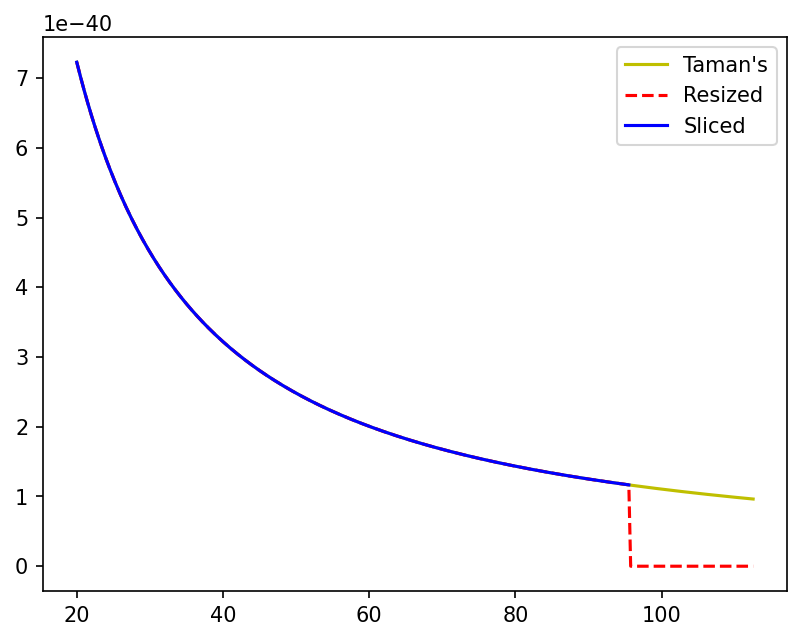

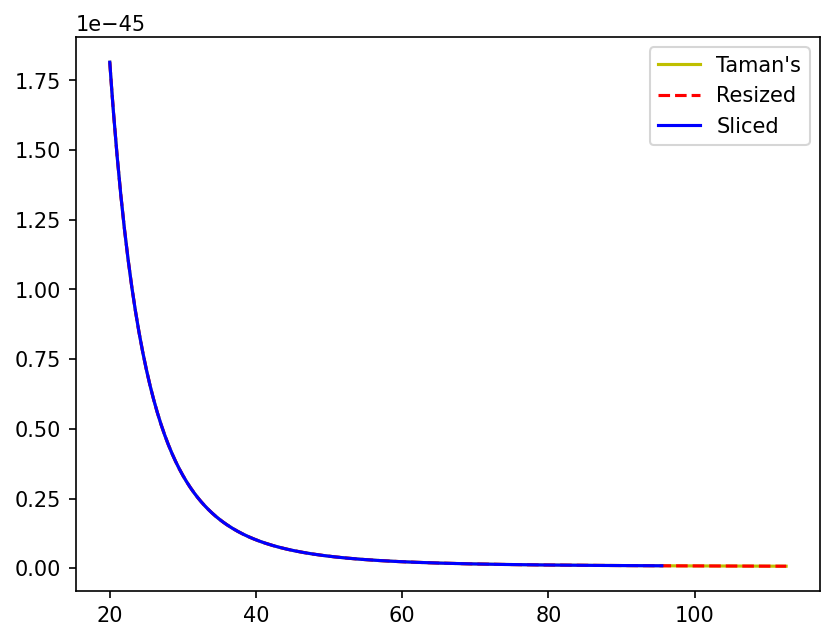

In [42]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)
lens_params["mcz"] = 17 * solar_mass

Taman_template, Taman_source, Taman_psd = Taman_waveform(NP_params, lens_params)
resized_template, resized_source, resized_psd = resize_waveform(NP_params, lens_params)
sliced_template, sliced_source, sliced_psd = slice_waveform(NP_params, lens_params)

# plot the template waveform in the frequency domain
plt.plot(
    Taman_template.sample_frequencies + 20,
    np.abs(Taman_template),
    "y-",
    label="Taman's",
)
plt.plot(
    resized_template.sample_frequencies + 20,
    np.abs(resized_template),
    "r--",
    label="Resized",
)
plt.plot(
    sliced_template.sample_frequencies + 20,
    np.abs(sliced_template),
    "b-",
    label="Sliced",
)
plt.legend()
plt.show()

# plot psd
plt.plot(Taman_psd.sample_frequencies + 20, Taman_psd, "y-", label="Taman's")
plt.plot(resized_psd.sample_frequencies + 20, resized_psd, "r--", label="Resized")
plt.plot(sliced_psd.sample_frequencies + 20, sliced_psd, "b-", label="Sliced")
plt.legend()
plt.show()

# plot NP waveforms at different $\mathcal{M}_{\text{NP}}$

Text(0.5, 1.0, 'Phase')

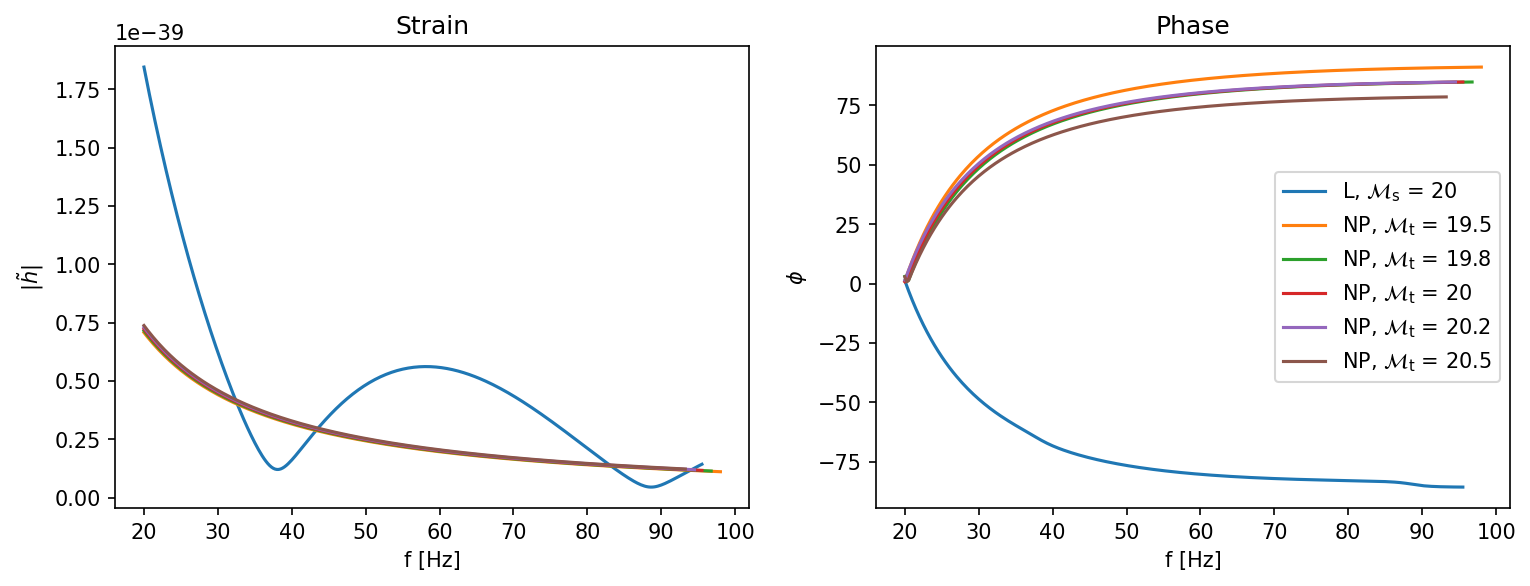

In [30]:
# put the above two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)
axs[0].plot(
    h_L["f_range"], np.abs(h_L["waveform"]), label=r"L, $\mathcal{M}_{\text{s}}$ = 20"
)
axs[1].plot(h_L["f_range"], h_L["phase"], label=r"L, $\mathcal{M}_{\text{s}}$ = 20")

mcz_arr = np.linspace(19.5, 20.5, 5)
for mcz in mcz_arr:
    NP_params["mcz"] = mcz * solar_mass
    h_RP = get_gw(NP_params)

    axs[0].plot(
        h_RP["f_range"],
        np.abs(h_RP["waveform"]),
        label=r"NP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )
    axs[1].plot(
        h_RP["f_range"],
        np.abs(h_RP["phase"]),
        label=r"NP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )

# axs[0].xscale("log")
axs[0].set_xlabel("f [Hz]")
axs[0].set_ylabel(r"$|\tilde{h}|$")
# axs[0].legend()
axs[0].set_title("Strain")

# axs[1].xscale("log")
axs[1].set_xlabel("f [Hz]")
axs[1].set_ylabel(r"$\phi$")
axs[1].legend()
axs[1].set_title("Phase")

Text(0.5, 1.0, 'Phase')

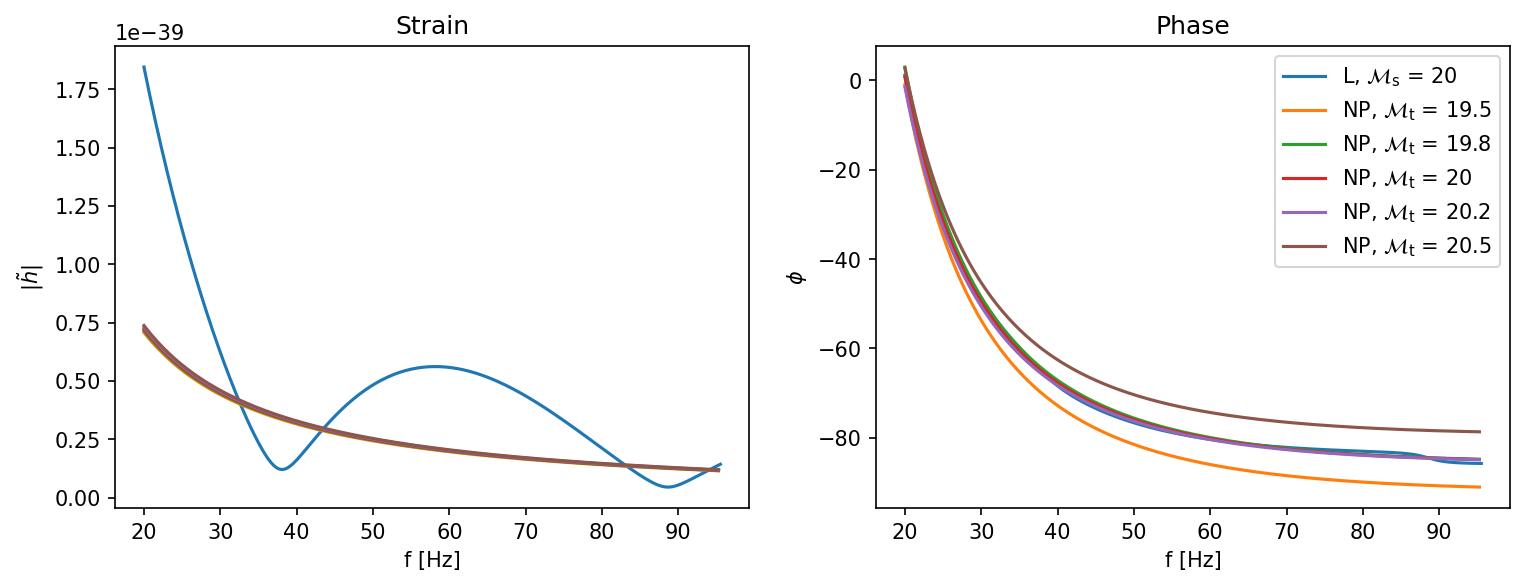

In [28]:
# put the above two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)
axs[0].plot(
    h_L["f_range"], np.abs(h_L["waveform"]), label=r"L, $\mathcal{M}_{\text{s}}$ = 20"
)
axs[1].plot(h_L["f_range"], h_L["phase"], label=r"L, $\mathcal{M}_{\text{s}}$ = 20")

mcz_arr = np.linspace(19.5, 20.5, 5)
for mcz in mcz_arr:
    NP_params["mcz"] = mcz * solar_mass
    RP_inst = Precessing(NP_params)
    f_range = np.arange(20, h_L["f_range"][-1], 0.25)
    h_RP = RP_inst.strain(f_range)

    axs[0].plot(
        f_range,
        np.abs(h_RP),
        label=r"NP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )
    phase_NP = np.unwrap(np.angle(h_RP))
    axs[1].plot(
        f_range,
        phase_NP,
        label=r"NP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )

# axs[0].xscale("log")
axs[0].set_xlabel("f [Hz]")
axs[0].set_ylabel(r"$|\tilde{h}|$")
# axs[0].legend()
axs[0].set_title("Strain")

# axs[1].xscale("log")
axs[1].set_xlabel("f [Hz]")
axs[1].set_ylabel(r"$\phi$")
axs[1].legend()
axs[1].set_title("Phase")

Text(0.5, 1.0, 'Phase')

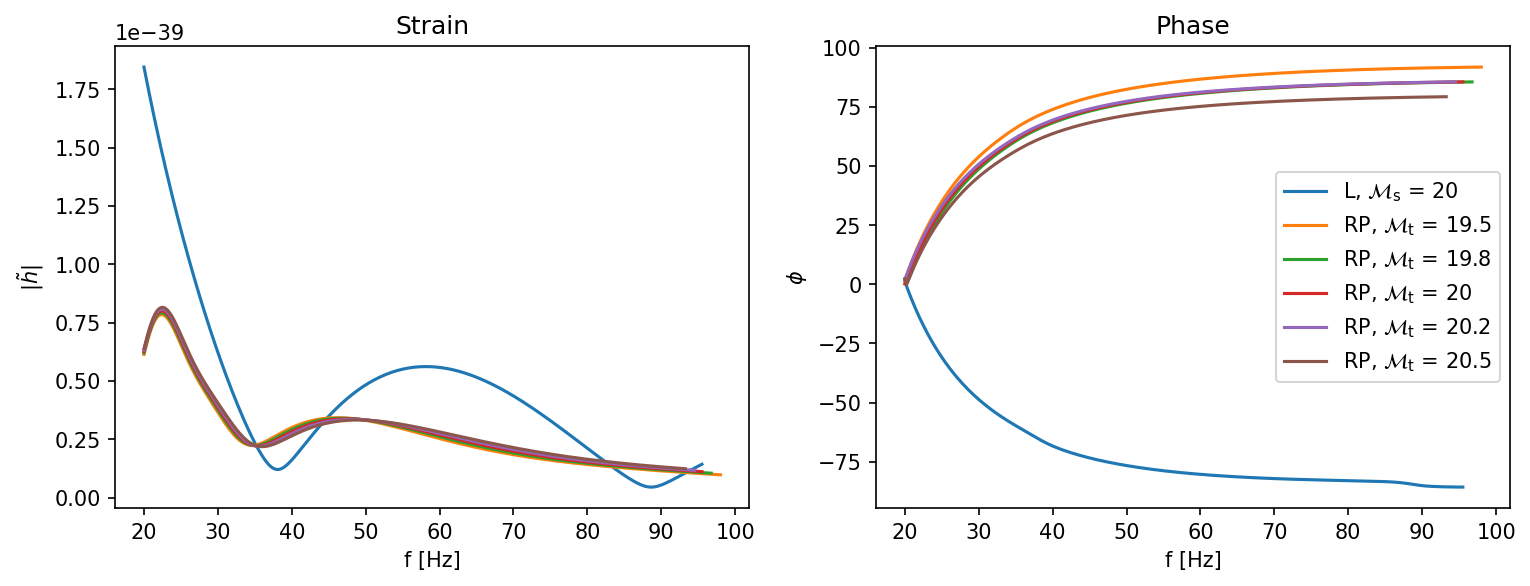

In [31]:
# put the above two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)
axs[0].plot(
    h_L["f_range"], np.abs(h_L["waveform"]), label=r"L, $\mathcal{M}_{\text{s}}$ = 20"
)
axs[1].plot(h_L["f_range"], h_L["phase"], label=r"L, $\mathcal{M}_{\text{s}}$ = 20")

mcz_arr = np.linspace(19.5, 20.5, 5)
for mcz in mcz_arr:
    RP_params["mcz"] = mcz * solar_mass
    h_RP = get_gw(RP_params)

    axs[0].plot(
        h_RP["f_range"],
        np.abs(h_RP["waveform"]),
        label=r"RP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )
    axs[1].plot(
        h_RP["f_range"],
        np.abs(h_RP["phase"]),
        label=r"RP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )

# axs[0].xscale("log")
axs[0].set_xlabel("f [Hz]")
axs[0].set_ylabel(r"$|\tilde{h}|$")
# axs[0].legend()
axs[0].set_title("Strain")

# axs[1].xscale("log")
axs[1].set_xlabel("f [Hz]")
axs[1].set_ylabel(r"$\phi$")
axs[1].legend()
axs[1].set_title("Phase")

Text(0.5, 1.0, 'Phase')

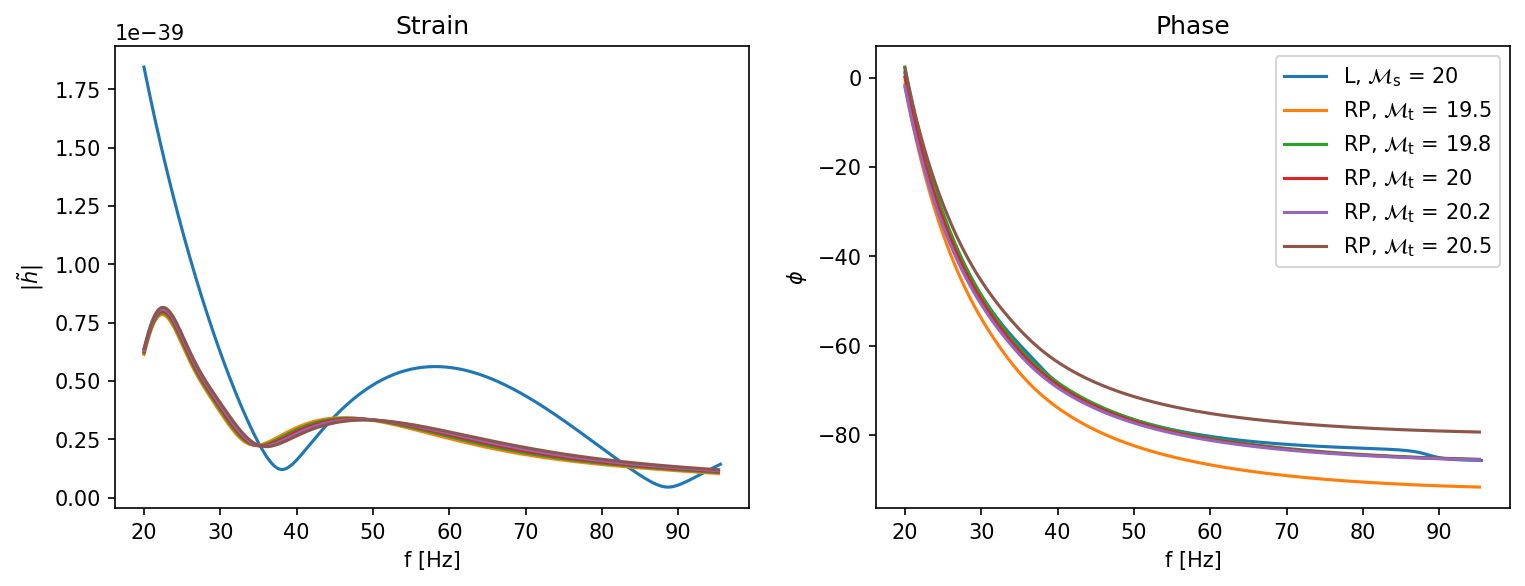

In [32]:
# put the above two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)
axs[0].plot(
    h_L["f_range"], np.abs(h_L["waveform"]), label=r"L, $\mathcal{M}_{\text{s}}$ = 20"
)
axs[1].plot(h_L["f_range"], h_L["phase"], label=r"L, $\mathcal{M}_{\text{s}}$ = 20")

mcz_arr = np.linspace(19.5, 20.5, 5)
for mcz in mcz_arr:
    RP_params["mcz"] = mcz * solar_mass
    RP_inst = Precessing(RP_params)
    f_range = np.arange(20, h_L["f_range"][-1], 0.25)
    h_RP = RP_inst.strain(f_range)

    axs[0].plot(
        f_range,
        np.abs(h_RP),
        label=r"RP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )
    t_phase = np.unwrap(np.angle(h_RP))
    axs[1].plot(
        f_range,
        t_phase,
        label=r"RP, {} = {:.3g}".format(r"$\mathcal{M}_{\text{t}}$", mcz),
    )

# axs[0].xscale("log")
axs[0].set_xlabel("f [Hz]")
axs[0].set_ylabel(r"$|\tilde{h}|$")
# axs[0].legend()
axs[0].set_title("Strain")

# axs[1].xscale("log")
axs[1].set_xlabel("f [Hz]")
axs[1].set_ylabel(r"$\phi$")
axs[1].legend()
axs[1].set_title("Phase")

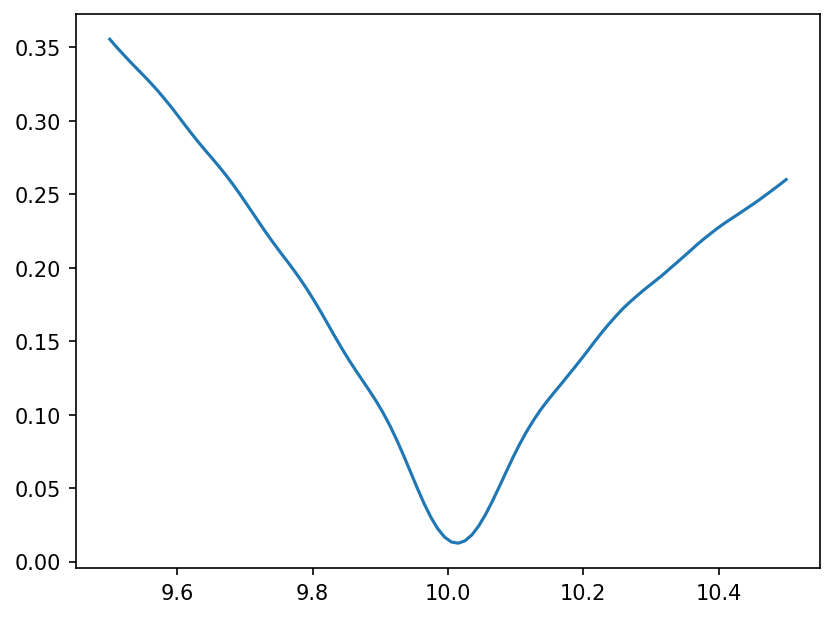

In [12]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# plot the mismatch between RP and NP over mcz
mcz_arr = np.linspace(9.5, 10.5, 100)
ep_RP_NP_arr = np.zeros(len(mcz_arr))

for i, mcz in enumerate(mcz_arr):
    RP_params["mcz"] = mcz * solar_mass
    ep_RP_NP = mismatch(
        "RP & NP",
        lens_params,
        RP_params,
        NP_params,
        return_index=False,
        return_phi=False,
        use_optimized_match=True,
    )
    ep_RP_NP_arr[i] = ep_RP_NP

plt.plot(mcz_arr, ep_RP_NP_arr, label=r"$\epsilon$", ls="-")

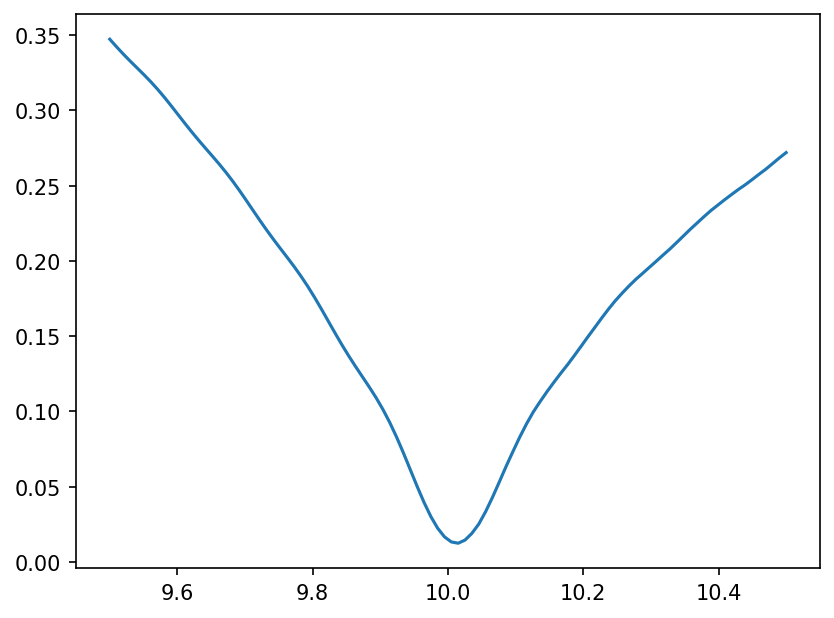

In [13]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# plot the mismatch between RP and NP over mcz
mcz_arr = np.linspace(9.5, 10.5, 100)
ep_RP_NP_arr = np.zeros(len(mcz_arr))

for i, mcz in enumerate(mcz_arr):
    RP_params["mcz"] = mcz * solar_mass
    ep_RP_NP = mismatch_general(RP_params, NP_params, use_optimized_match=True)[
        "mismatch"
    ]
    ep_RP_NP_arr[i] = ep_RP_NP

plt.plot(mcz_arr, ep_RP_NP_arr, label=r"$\epsilon$", ls="-")

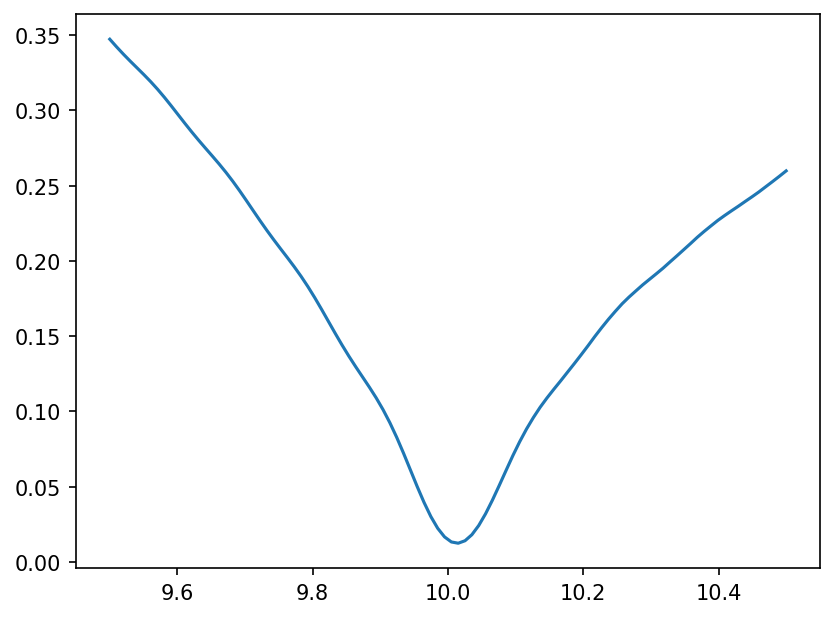

In [14]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_0, RP_params_0, NP_params_0
)

# plot the mismatch between RP and NP over mcz
mcz_arr = np.linspace(9.5, 10.5, 100)
ep_RP_NP_arr = np.zeros(len(mcz_arr))

for i, mcz in enumerate(mcz_arr):
    RP_params["mcz"] = mcz * solar_mass
    gw1 = get_gw(RP_params)["waveform"]
    gw2 = get_gw(NP_params)["waveform"]

    # truncate the longer waveform to the length of the shorter waveform
    if len(gw1) < len(gw2):
        gw2 = gw2[: len(gw1)]
    else:
        gw1 = gw1[: len(gw2)]

    # f_range has shape of the shorter waveform
    f_range1 = get_gw(RP_params)["f_range"]
    f_range2 = get_gw(NP_params)["f_range"]
    f_range = f_range1 if len(f_range1) < len(f_range2) else f_range2

    psd_n = Sn(f_range)

    match_val, index, phi = optimized_match(gw1, gw2, psd_n, return_phase=True)  # type: ignore
    mismatch = 1 - match_val

    ep_RP_NP_arr[i] = mismatch

plt.plot(mcz_arr, ep_RP_NP_arr, label=r"$\epsilon$", ls="-")

# explore $t_c$ and $\phi_c$

In [37]:
def compare_pycbc_match_functions(params1, params2):
    n_runs = 50
    ep_arr = np.zeros(n_runs)
    ep_opt_arr = np.zeros(n_runs)

    for i in range(n_runs):
        ep_arr[i] = mismatch_general(params1, params2, use_optimized_match=False)[
            "mismatch"
        ]
        ep_arr[i] = np.around(ep_arr[i], decimals=4)
        ep_opt_arr[i] = mismatch_general(params1, params2, use_optimized_match=True)[
            "mismatch"
        ]
        ep_opt_arr[i] = np.around(ep_opt_arr[i], decimals=4)

    # plot 2 arrays and their difference
    plt.plot(ep_arr, label="ep")
    plt.plot(ep_opt_arr, label="ep_opt")
    plt.text(0, np.mean(ep_arr), "mean = {:.4g}".format(np.mean(ep_arr)))  # type: ignore
    plt.text(0, np.mean(ep_opt_arr), "mean = {:.4g}".format(np.mean(ep_opt_arr)))  # type: ignore
    # plt.plot(ep_arr - ep_opt_arr, label="diff")
    plt.legend()
    plt.xlabel("Run")
    plt.ylabel(r"$\epsilon$")
    plt.show()

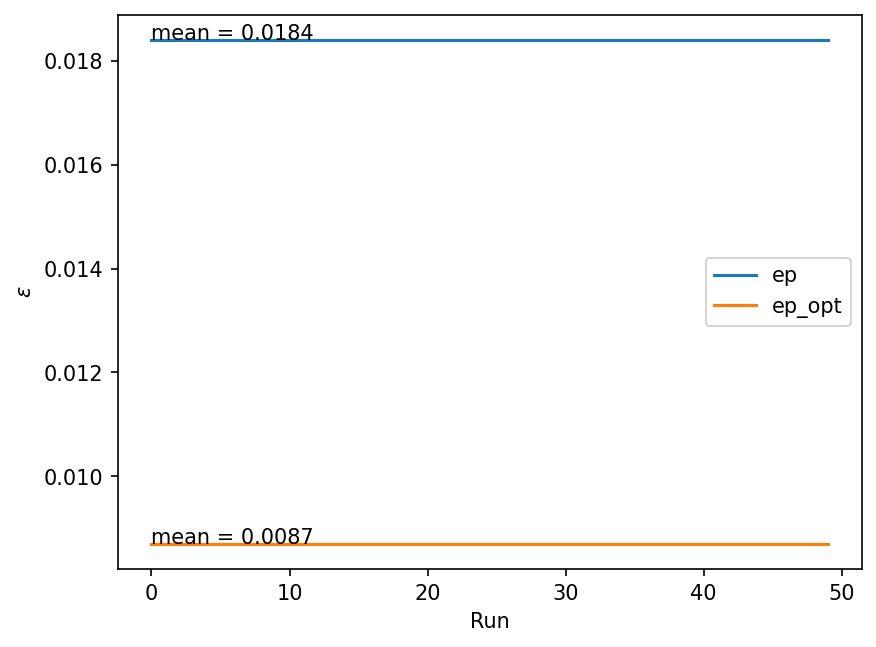

In [77]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["random"], lens_params_0, RP_params_0, NP_params_0
)

mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.26
RP_params["theta_tilde"] = 2.11
RP_params["gamma_P"] = 3.55
RP_params["t_c"] = 0

compare_pycbc_match_functions(RP_params, NP_params)

In [53]:
def optimize_mismatch_tc(params1, params2, use_optimized_match=True):
    tc_arr = np.linspace(0, 4, 300)
    ep_arr = np.zeros(len(tc_arr))
    idx_arr = np.zeros(len(tc_arr))
    phi_arr = np.zeros(len(tc_arr))

    for i, tc in enumerate(tc_arr):
        params1["t_c"] = tc
        mismatch_results = mismatch_general(
            params1, params2, use_optimized_match=use_optimized_match
        )
        ep_arr[i] = np.around(mismatch_results["mismatch"], decimals=4)
        idx_arr[i] = mismatch_results["index"]
        phi_arr[i] = mismatch_results["phi"]

    return {"tc_arr": tc_arr, "ep_arr": ep_arr, "idx_arr": idx_arr, "phi_arr": phi_arr}

In [54]:
def optimize_mismatch_phi_c(params1, params2, use_optimized_match=True):
    phi_c_arr = np.linspace(-np.pi, np.pi, 300)
    ep_arr = np.zeros(len(phi_c_arr))
    idx_arr = np.zeros(len(phi_c_arr))
    phi_arr = np.zeros(len(phi_c_arr))

    for i, phi_c in enumerate(phi_c_arr):
        params1["phi_c"] = phi_c
        mismatch_results = mismatch_general(
            params1, params2, use_optimized_match=use_optimized_match
        )
        ep_arr[i] = np.around(mismatch_results["mismatch"], decimals=4)
        idx_arr[i] = mismatch_results["index"]
        phi_arr[i] = mismatch_results["phi"]

    return {
        "phi_c_arr": phi_c_arr,
        "ep_arr": ep_arr,
        "idx_arr": idx_arr,
        "phi_arr": phi_arr,
    }

In [68]:
def plot_mismatch_fluctuations(x_var, params1, params2, opt_match=True):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))
    which_params = {
        str(lens_params): "lensed",
        str(RP_params): "RP",
        str(NP_params): "NP",
    }
    original_params1 = params1.copy()
    original_params2 = params2.copy()

    if x_var == "tc":
        results = optimize_mismatch_tc(params1, params2, use_optimized_match=opt_match)

        axes[0].plot(
            results["tc_arr"],
            results["ep_arr"],
            label=r"$\epsilon$, opt_match = {}".format(opt_match),
        )
        axes[0].set_ylabel(r"$\epsilon$")
        axes[0].set_xlabel(r"$t_c$")
        axes[0].legend()

        axes[1].plot(results["tc_arr"], results["idx_arr"], label=r"$\text{index}$")
        axes[1].set_ylabel(r"$\text{index}$")
        axes[1].set_xlabel(r"$t_c$")

        axes[2].plot(results["tc_arr"], results["phi_arr"], label=r"$\phi$")
        axes[2].set_ylabel(r"$\phi$")
        axes[2].set_xlabel(r"$t_c$")

        axes[0].set_title(
            r"Mismatch Fluctuations Over $t_c$ between {} and {}".format(
                which_params[str(original_params1)], which_params[str(original_params2)]
            )
        )

    elif x_var == "phi_c":
        results = optimize_mismatch_phi_c(
            params1, params2, use_optimized_match=opt_match
        )

        axes[0].plot(
            results["phi_c_arr"],
            results["ep_arr"],
            label=r"$\epsilon$, opt_match = {}".format(opt_match),
        )
        axes[0].set_ylabel(r"$\epsilon$")
        axes[0].set_xlabel(r"$\phi_c$")
        axes[0].legend()

        axes[1].plot(results["phi_c_arr"], results["idx_arr"], label=r"$\text{index}$")
        axes[1].set_ylabel(r"$\text{index}$")
        axes[1].set_xlabel(r"$\phi_c$")

        axes[2].plot(results["phi_c_arr"], results["phi_arr"], label=r"$\phi$")
        axes[2].set_ylabel(r"$\phi$")
        axes[2].set_xlabel(r"$\phi_c$")

        axes[0].set_title(
            r"Mismatch Fluctuations Over $\phi_c$ between {} and {}".format(
                which_params[str(original_params1)], which_params[str(original_params2)]
            )
        )

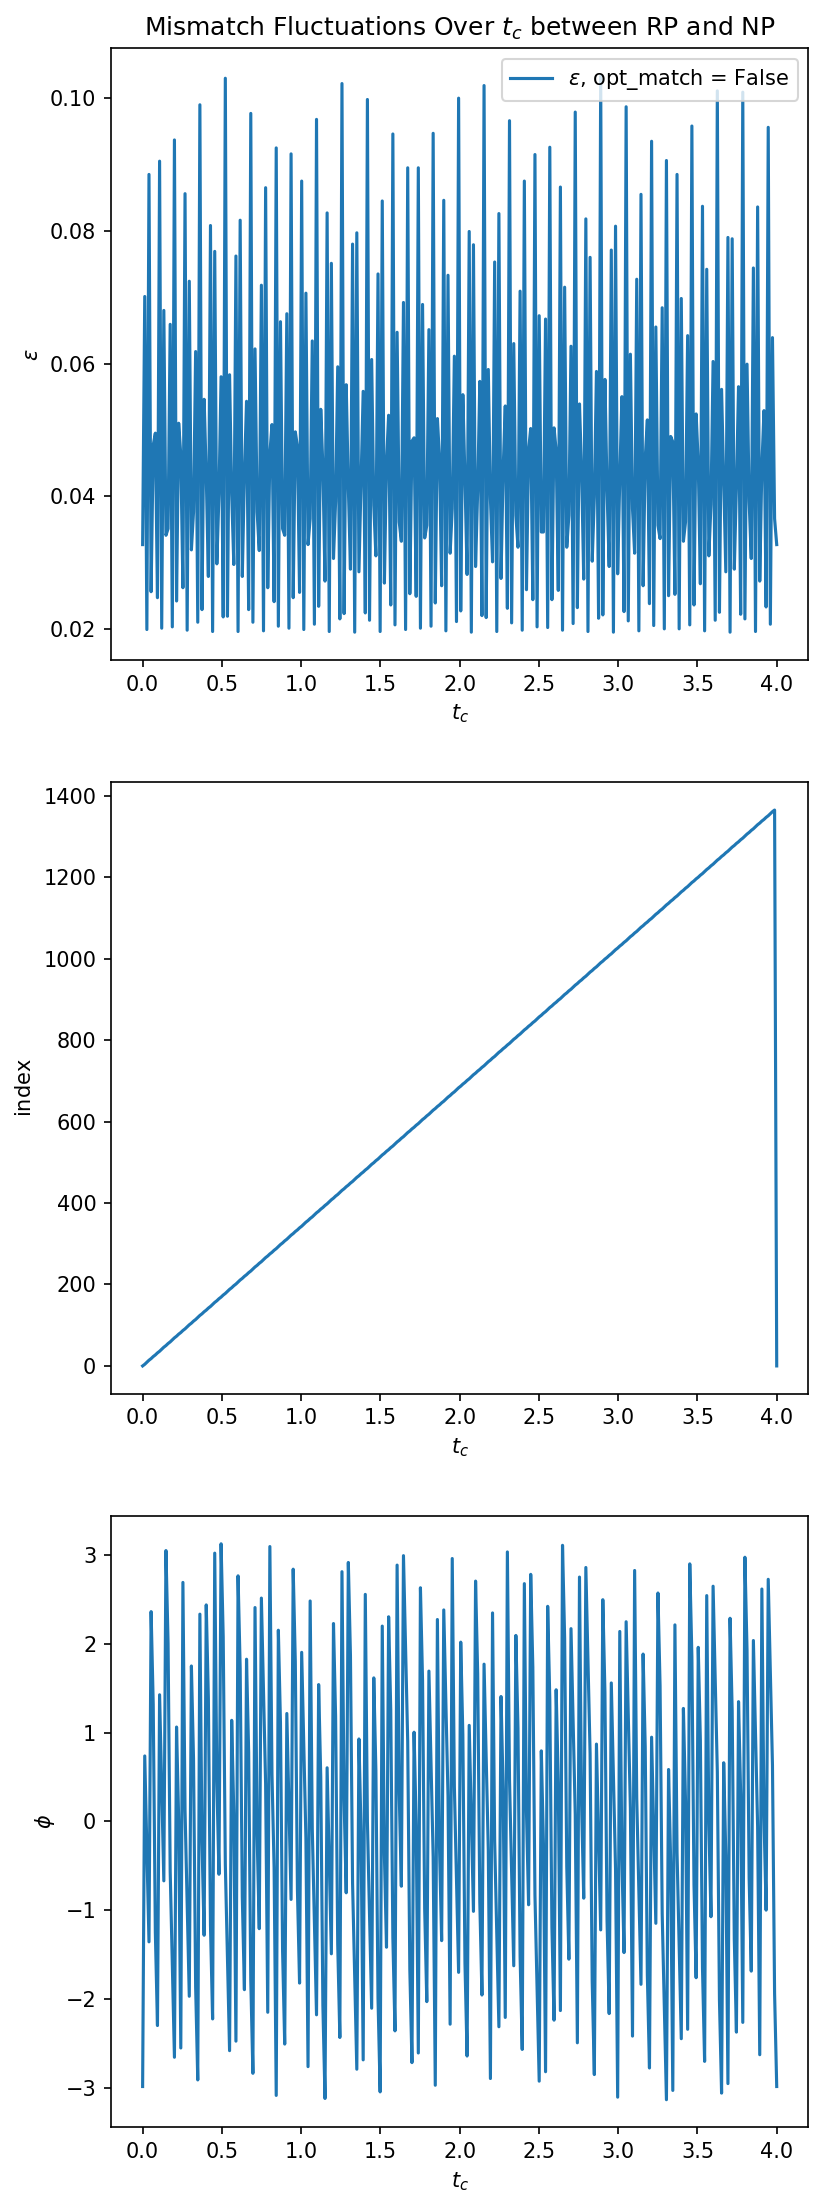

In [96]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params_0, RP_params_0, NP_params_0
)

mcz = 10
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = omega_theta_tilde_pairs["05%"]["omega_tilde"]
RP_params["theta_tilde"] = omega_theta_tilde_pairs["05%"]["theta_tilde"]

plot_mismatch_fluctuations("tc", RP_params, NP_params, opt_match=False)

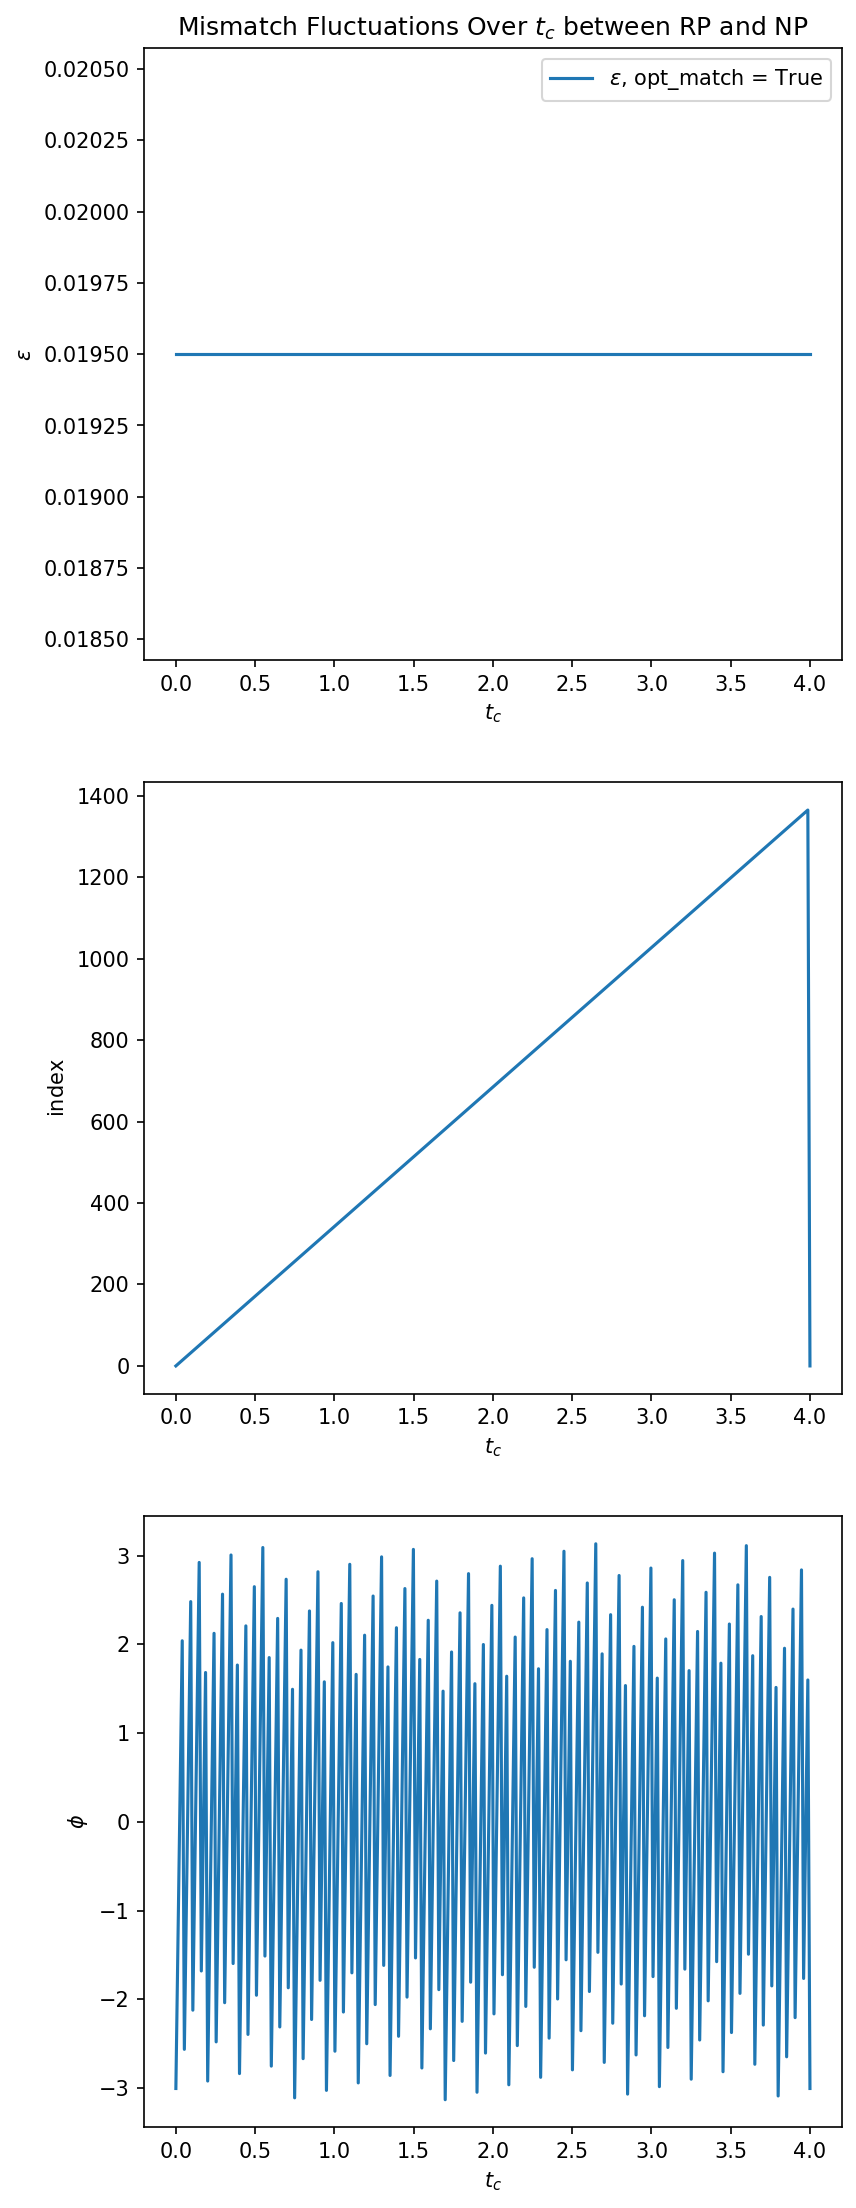

In [97]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params_0, RP_params_0, NP_params_0
)

mcz = 10
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = omega_theta_tilde_pairs["05%"]["omega_tilde"]
RP_params["theta_tilde"] = omega_theta_tilde_pairs["05%"]["theta_tilde"]

plot_mismatch_fluctuations("tc", RP_params, NP_params, opt_match=True)

Text(0.5, 0, '$t_c$')

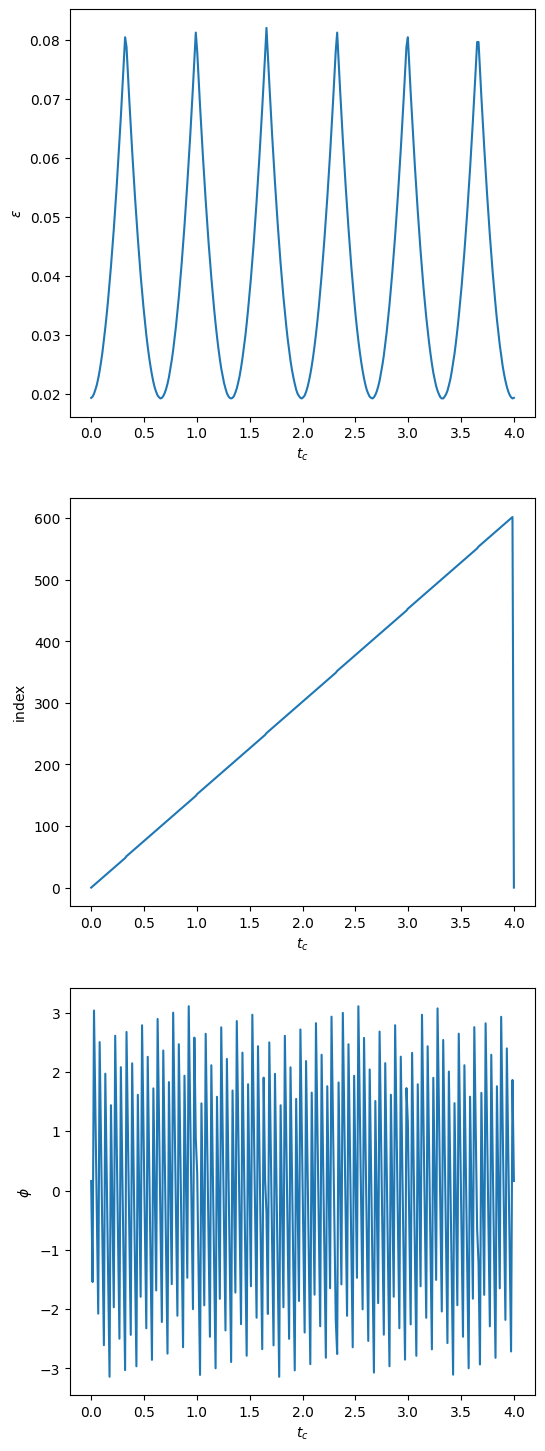

In [16]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params_0, RP_params_0, NP_params_0
)

mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.26
RP_params["theta_tilde"] = 2.11
RP_params["gamma_P"] = 3.5541250222429985

results_tc = optimize_mismatch_tc(RP_params, lens_params, use_optimized_match=False)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

axes[0].plot(results_tc["tc_arr"], results_tc["ep_arr"], label=r"$\epsilon$")
axes[0].set_ylabel(r"$\epsilon$")
axes[0].set_xlabel(r"$t_c$")

axes[1].plot(results_tc["tc_arr"], results_tc["idx_arr"], label=r"$\text{index}$")
axes[1].set_ylabel(r"$\text{index}$")
axes[1].set_xlabel(r"$t_c$")

axes[2].plot(results_tc["tc_arr"], results_tc["phi_arr"], label=r"$\phi$")
axes[2].set_ylabel(r"$\phi$")
axes[2].set_xlabel(r"$t_c$")

Text(0.5, 0, '$t_c$')

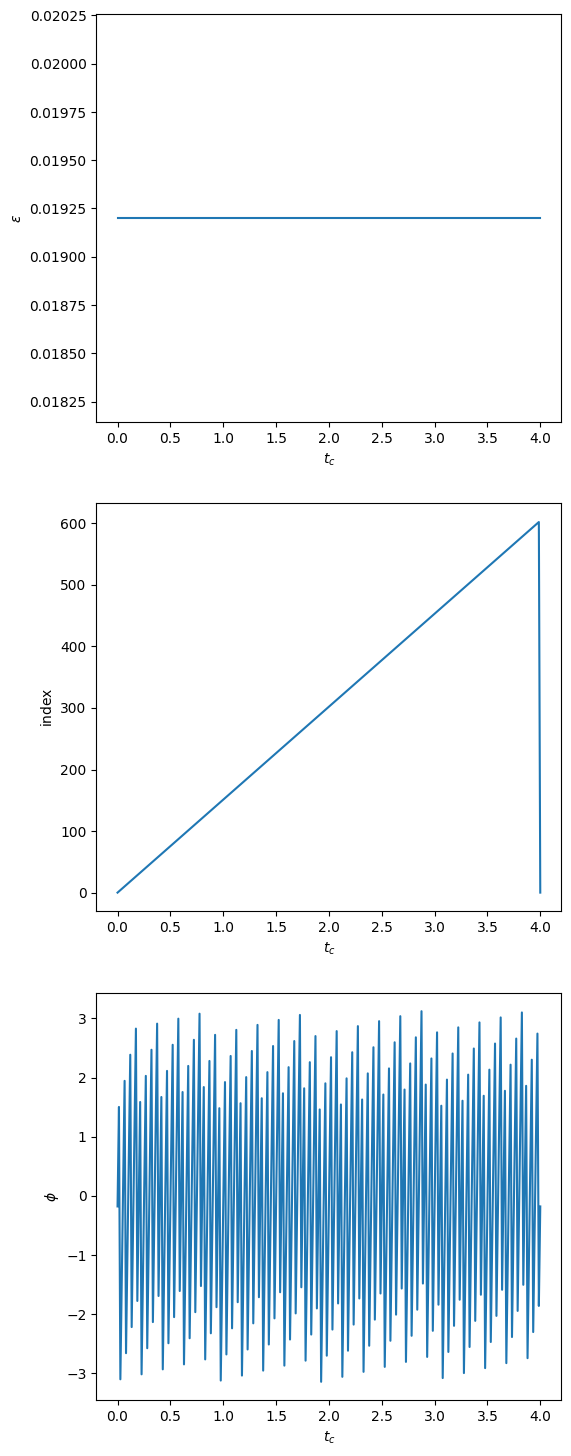

In [17]:
lens_params, RP_params, NP_params = set_to_location(
    loc_params["sys1"]["edgeon"], lens_params_0, RP_params_0, NP_params_0
)

mcz = 20
lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 1.26
RP_params["theta_tilde"] = 2.11
RP_params["gamma_P"] = 3.5541250222429985

results_tc = optimize_mismatch_tc(RP_params, lens_params, use_optimized_match=True)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

axes[0].plot(results_tc["tc_arr"], results_tc["ep_arr"], label=r"$\epsilon$")
axes[0].set_ylabel(r"$\epsilon$")
axes[0].set_xlabel(r"$t_c$")

axes[1].plot(results_tc["tc_arr"], results_tc["idx_arr"], label=r"$\text{index}$")
axes[1].set_ylabel(r"$\text{index}$")
axes[1].set_xlabel(r"$t_c$")

axes[2].plot(results_tc["tc_arr"], results_tc["phi_arr"], label=r"$\phi$")
axes[2].set_ylabel(r"$\phi$")
axes[2].set_xlabel(r"$t_c$")

In [7]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8

results = optimize_mismatch_gammaP_general(
    RP_params, lens_params, use_optimized_match=True
)
print(results)
RP_params["gamma_P"] = results["ep_min_gamma"]

{'ep_min': 0.04558908171657705, 'ep_min_gamma': 4.823455387329783, 'ep_min_idx': 603.2349407976188, 'ep_min_phi': -1.5387571086310003, 'ep_max': 0.49736183499389075, 'ep_max_gamma': 1.3962634015954636, 'ep_max_idx': 1.0183273000819966, 'ep_max_phi': -3.0463712512017453, 'ep_0': 0.22348650024818983, 'ep_0_ind': 602.8762970948394, 'ep_0_phi': -0.9392223091093947}


Text(0.5, 0, '$t_c$')

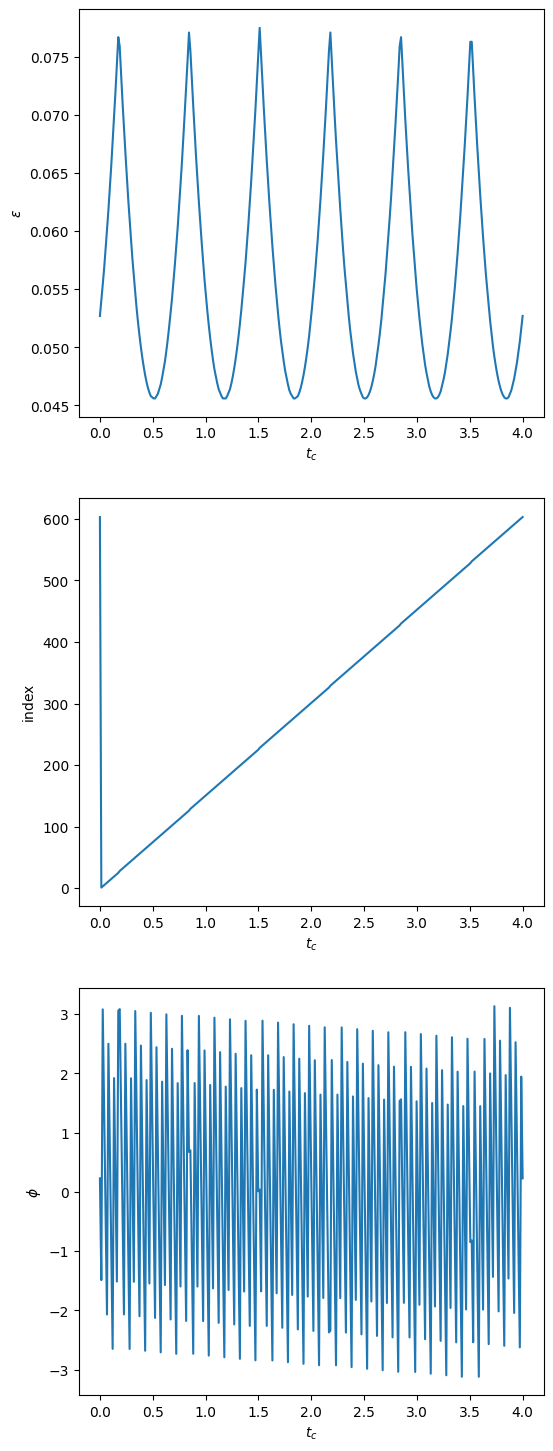

In [142]:
results_tc = optimize_mismatch_tc(RP_params, lens_params, use_optimized_match=False)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

axes[0].plot(results_tc["tc_arr"], results_tc["ep_arr"], label=r"$\epsilon$")
axes[0].set_ylabel(r"$\epsilon$")
axes[0].set_xlabel(r"$t_c$")

axes[1].plot(results_tc["tc_arr"], results_tc["idx_arr"], label=r"$\text{index}$")
axes[1].set_ylabel(r"$\text{index}$")
axes[1].set_xlabel(r"$t_c$")

axes[2].plot(results_tc["tc_arr"], results_tc["phi_arr"], label=r"$\phi$")
axes[2].set_ylabel(r"$\phi$")
axes[2].set_xlabel(r"$t_c$")

Text(0.5, 0, '$t_c$')

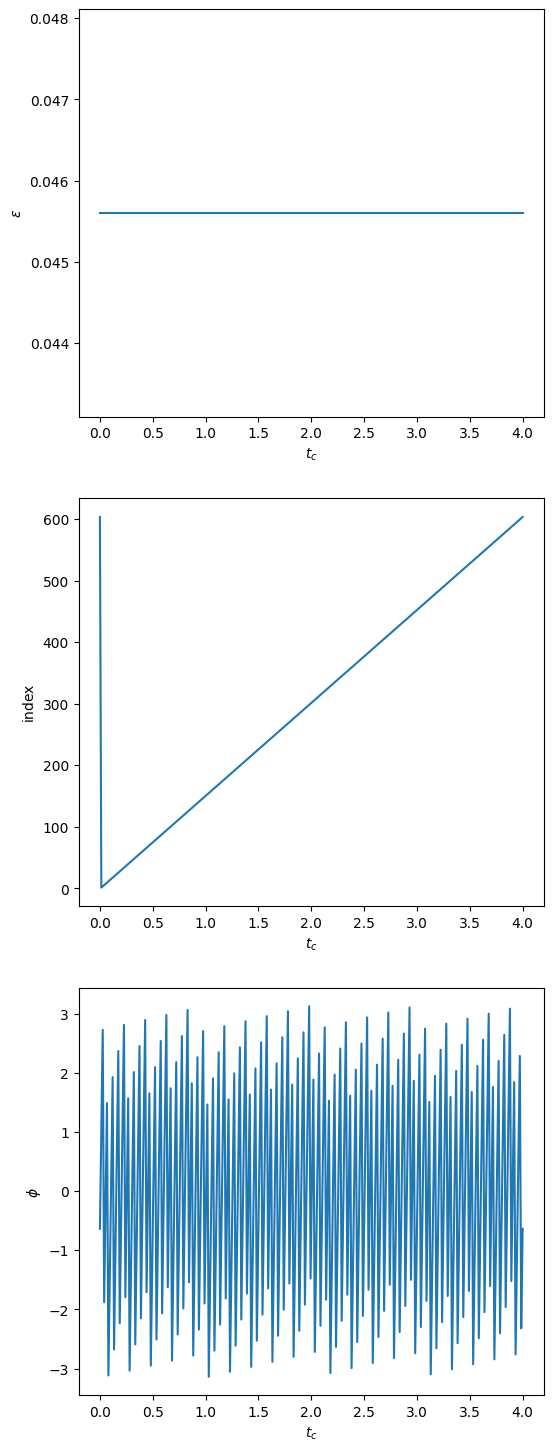

In [143]:
results_tc = optimize_mismatch_tc(RP_params, lens_params, use_optimized_match=True)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

axes[0].plot(results_tc["tc_arr"], results_tc["ep_arr"], label=r"$\epsilon$")
axes[0].set_ylabel(r"$\epsilon$")
axes[0].set_xlabel(r"$t_c$")

axes[1].plot(results_tc["tc_arr"], results_tc["idx_arr"], label=r"$\text{index}$")
axes[1].set_ylabel(r"$\text{index}$")
axes[1].set_xlabel(r"$t_c$")

axes[2].plot(results_tc["tc_arr"], results_tc["phi_arr"], label=r"$\phi$")
axes[2].set_ylabel(r"$\phi$")
axes[2].set_xlabel(r"$t_c$")

In [54]:
from scipy import stats

tc_arr = results_tc["tc_arr"][1:]
idx_arr = results_tc["idx_arr"][1:]

idx_slope, idx_intercept, r_value, p_value, std_err = stats.linregress(tc_arr, idx_arr)
print(idx_slope, idx_intercept, r_value, p_value, std_err)

delta_t = get_gw(RP_params)["waveform"].delta_t
print(1 / delta_t)

# t_c = (delta_t - idx_intercept) / idx_slope

151.0000000011455 -0.7650592047497184 1.0 0.0 0.0
151.0


In [127]:
get_gw(RP_params)["waveform"].to_timeseries().sample_times.shape
print(4 / 604)

0.006622516556291391


In [18]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8

results = optimize_mismatch_gammaP_general(
    RP_params, lens_params, use_optimized_match=True
)
print(results)
RP_params["gamma_P"] = results["ep_min_gamma"]

delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = (1 - 0.235) * delta_t

{'ep_min': 0.04558908171657705, 'ep_min_gamma': 4.823455387329783, 'ep_min_idx': 603.2349407976188, 'ep_min_phi': -1.5387571086310003, 'ep_max': 0.49736183499389075, 'ep_max_gamma': 1.3962634015954636, 'ep_max_idx': 1.0183273000819966, 'ep_max_phi': -3.0463712512017453, 'ep_0': 0.22348650024818983, 'ep_0_ind': 602.8762970948394, 'ep_0_phi': -0.9392223091093947}


Text(0.5, 0, '$\\phi_c$')

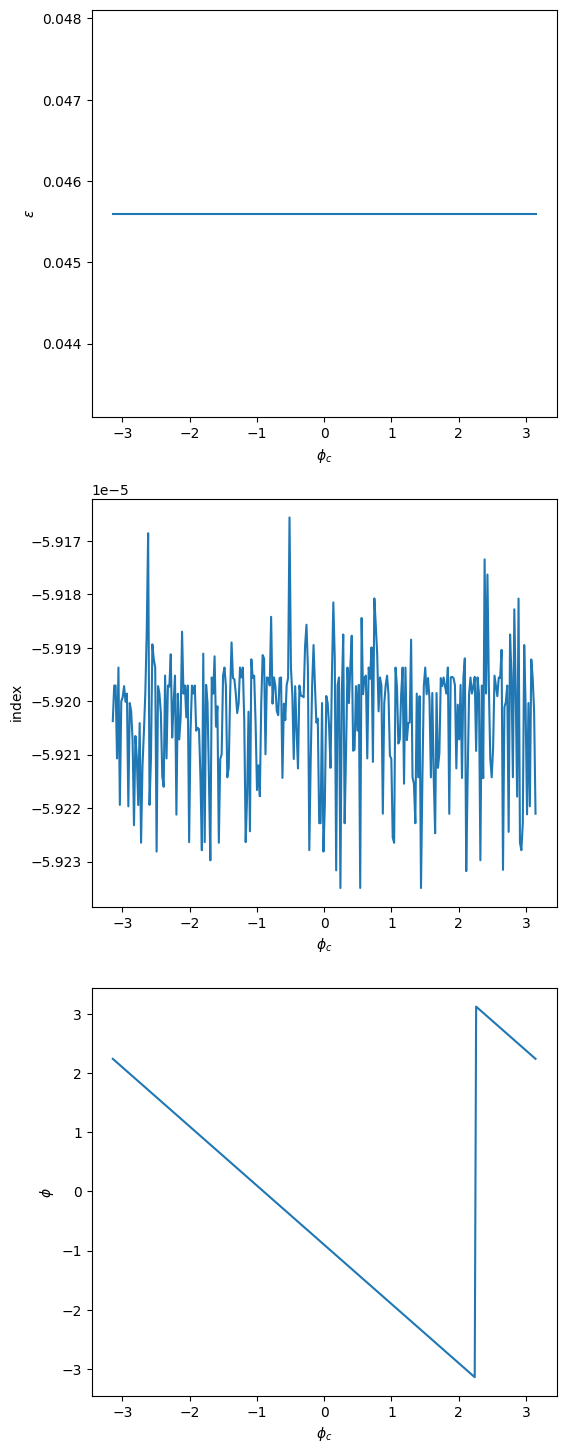

In [20]:
results_phi_c = optimize_mismatch_phi_c(RP_params, lens_params)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

axes[0].plot(results_phi_c["phi_c_arr"], results_phi_c["ep_arr"], label=r"$\epsilon$")
axes[0].set_ylabel(r"$\epsilon$")
axes[0].set_xlabel(r"$\phi_c$")

axes[1].plot(
    results_phi_c["phi_c_arr"], results_phi_c["idx_arr"], label=r"$\text{index}$"
)
axes[1].set_ylabel(r"$\text{index}$")
axes[1].set_xlabel(r"$\phi_c$")

axes[2].plot(results_phi_c["phi_c_arr"], results_phi_c["phi_arr"], label=r"$\phi$")
axes[2].set_ylabel(r"$\phi$")
axes[2].set_xlabel(r"$\phi_c$")

Text(0.5, 0, '$\\phi_c$')

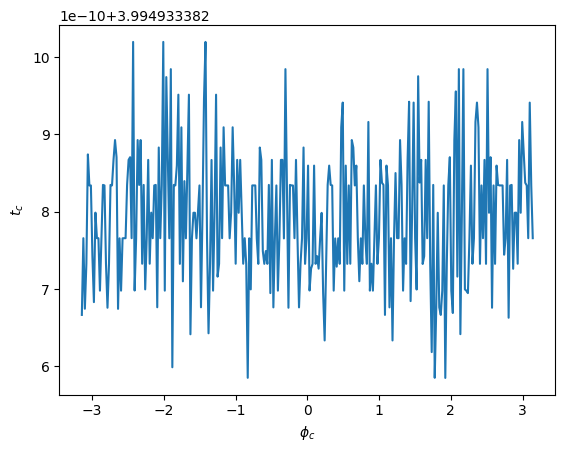

In [59]:
delta_t = get_gw(RP_params)["waveform"].delta_t
plt.plot(results_phi_c["phi_c_arr"], results_phi_c["idx_arr"] * delta_t, label=r"$t_c$")
plt.ylabel(r"$t_c$")
plt.xlabel(r"$\phi_c$")

In [63]:
phi_c_arr = results_phi_c["phi_c_arr"]
phi_arr = results_phi_c["phi_arr"]

phi_c_arr = phi_c_arr[phi_arr < 1]
phi_arr = phi_arr[phi_arr < 1]

phi_slope, phi_intercept, r_value, p_value, std_err = stats.linregress(
    phi_c_arr, phi_arr
)
print(phi_slope, phi_intercept, r_value, p_value, std_err)

-0.9999999979500199 -1.5387571158031728 -0.9999999999999997 0.0 1.8482615699610077e-09


In [15]:
# find the minimum of ep_arr and its corresponding tc
ep_min_idx = np.argmin(results_tc["ep_arr"])
ep_min = results_tc["ep_arr"][ep_min_idx]
tc_min = results_tc["tc_arr"][ep_min_idx]
phi_min = results_tc["phi_arr"][ep_min_idx]
print(ep_min, tc_min, phi_min)

0.0456 0.0 -1.5387571086310003


{'mismatch': 0.04558908171657439, 'index': 5.296086371874323e-09, 'phi': -0.9020672185732634}


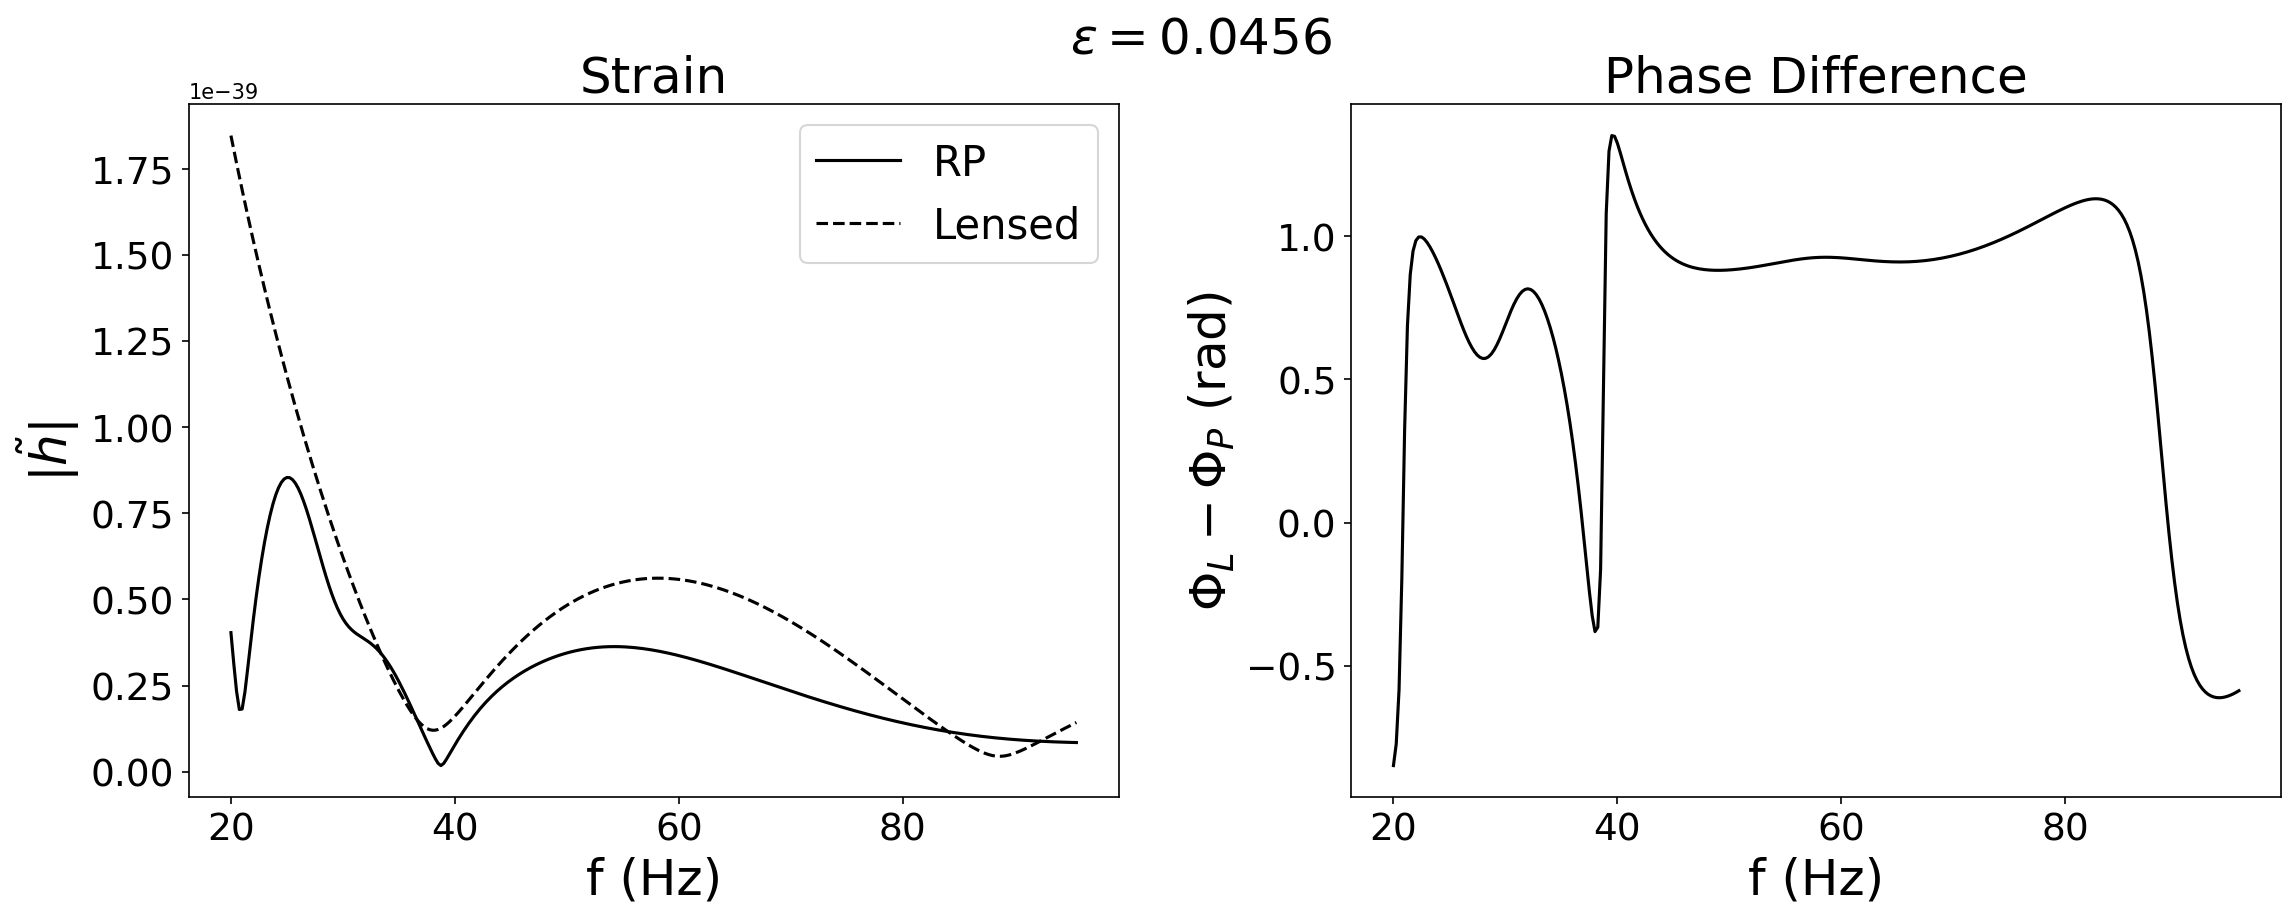

In [17]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
# RP_params["t_c"] = -603.2349407976188 * delta_t
# RP_params["phi_c"] = -0.9021164653664865

print(mismatch_general(RP_params, lens_params, use_optimized_match=True))
# waveform_comparison()

{'mismatch': 0.045589081716568725, 'index': 5.4111180601657065e-09, 'phi': 4.924659311545643e-05}


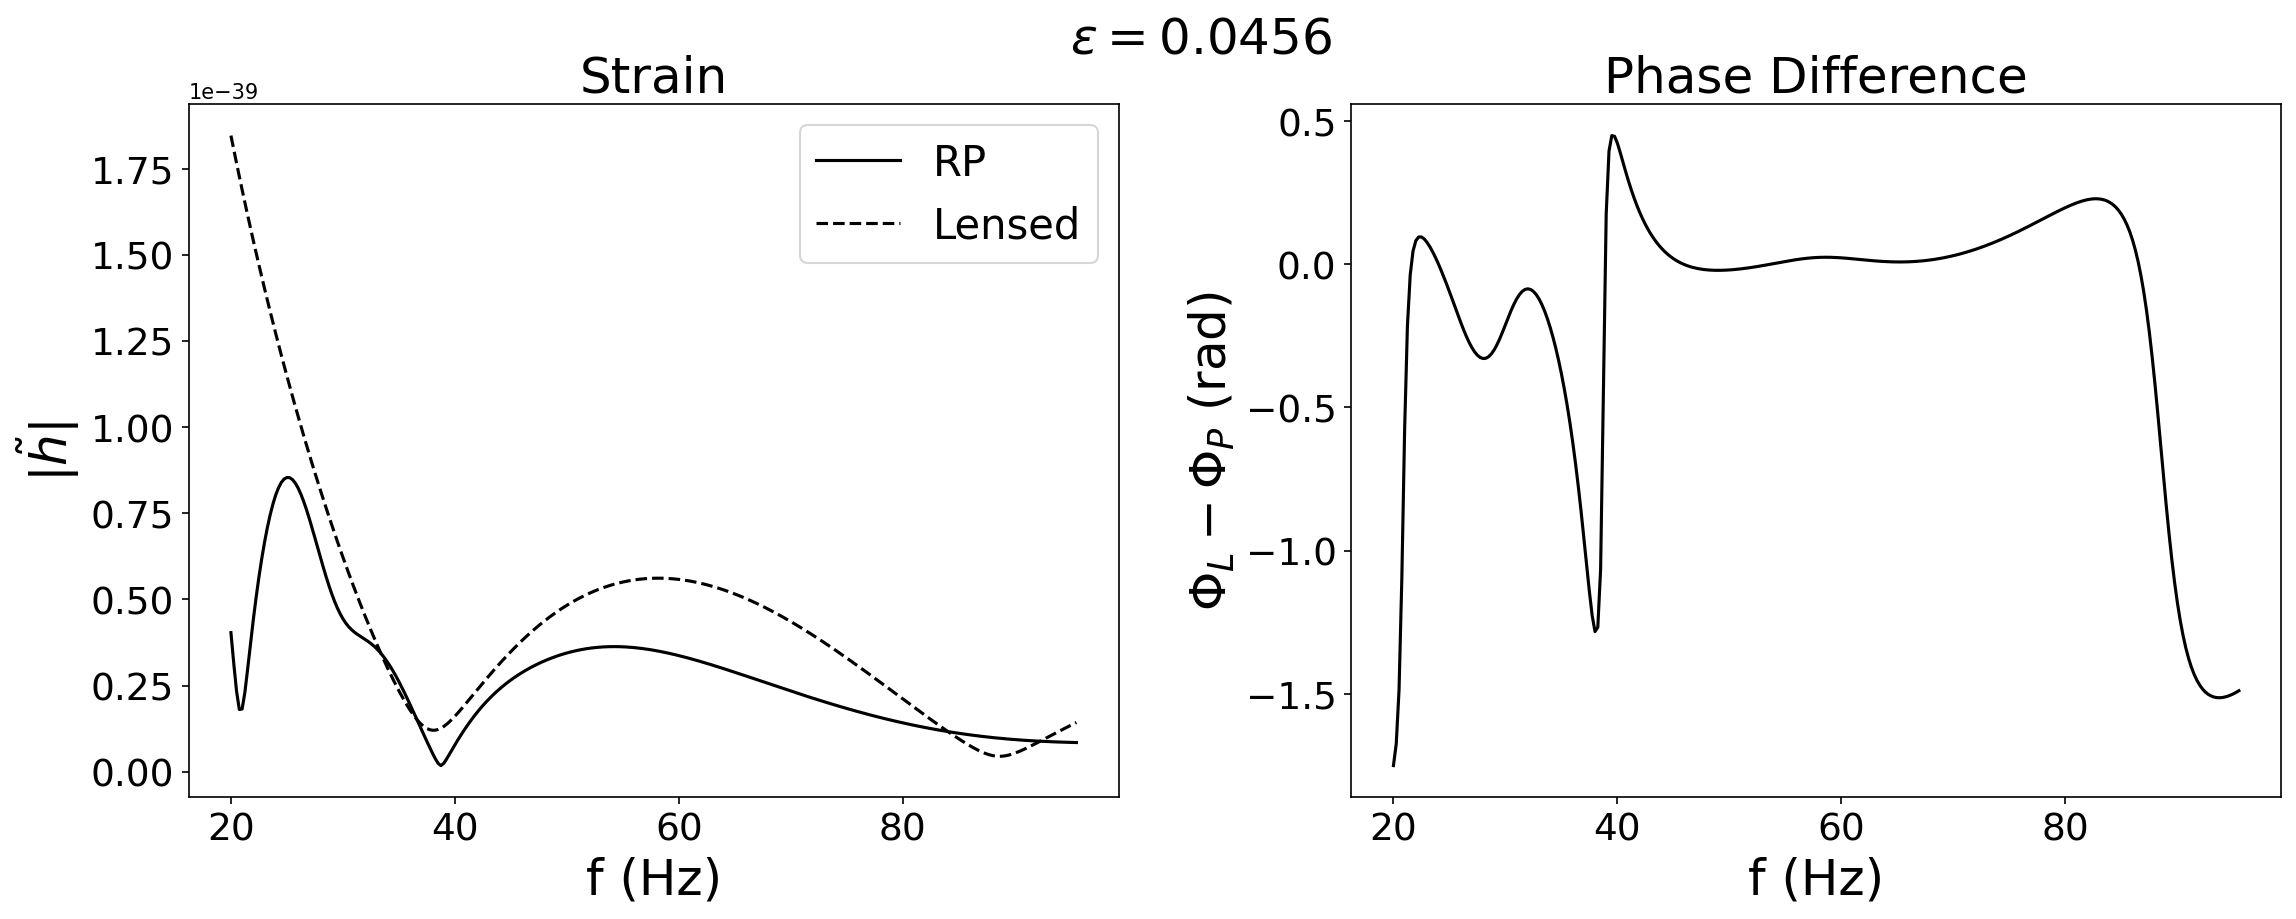

In [18]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = -603.2349407976188 * delta_t
RP_params["phi_c"] = -0.9021164653664865

print(mismatch_general(RP_params, lens_params, use_optimized_match=True))
# waveform_comparison()

# explore TimeSeries and FrequencySeries

In [3]:
from pycbc.types import TimeSeries, FrequencySeries

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.82

Text(0.5, 0, 'f (Hz)')

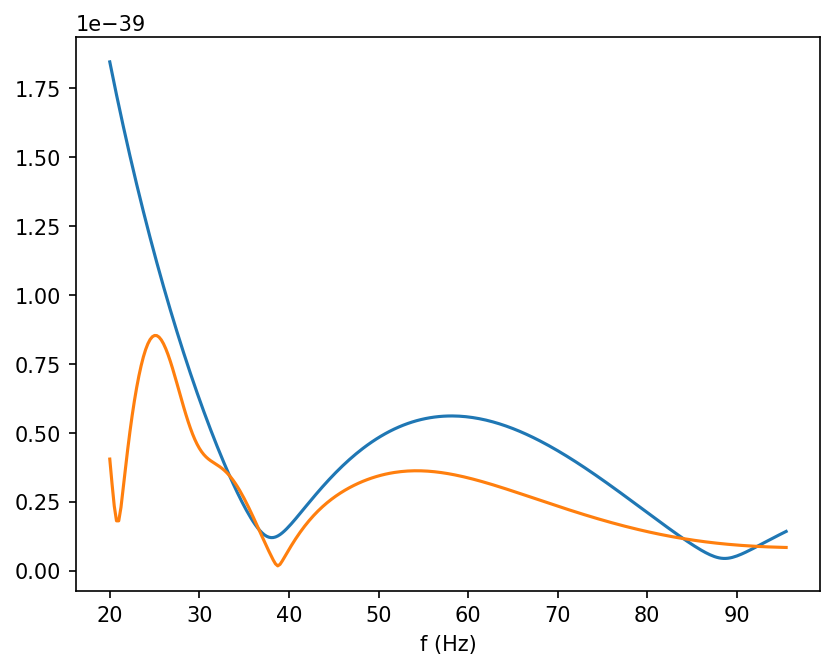

In [ ]:
h_lens = get_gw(lens_params)
h_RP = get_gw(RP_params)

plt.plot(h_lens["f_range"], np.abs(h_lens["waveform"]), label="L")
plt.plot(h_RP["f_range"], np.abs(h_RP["waveform"]), label="RP")
plt.xlabel("f (Hz)")
plt.ylabel(r"$|\tilde{h}|$")
plt.legend()

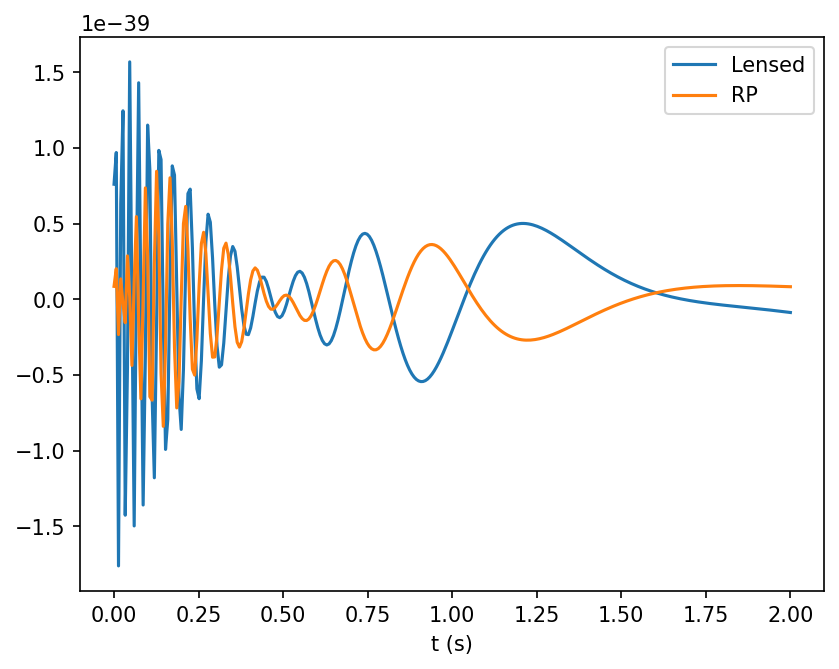

In [8]:
h_lens = get_gw(lens_params)["waveform"]
h_RP = get_gw(RP_params)["waveform"]

time_series_lens = TimeSeries(h_lens.data, delta_t=h_lens.delta_t)
time_series_RP = TimeSeries(h_RP.data, delta_t=h_RP.delta_t)

plt.plot(time_series_lens.sample_times, time_series_lens, label="Lensed")
plt.plot(time_series_RP.sample_times, time_series_RP, label="RP")
plt.xlabel("t (s)")
plt.legend()

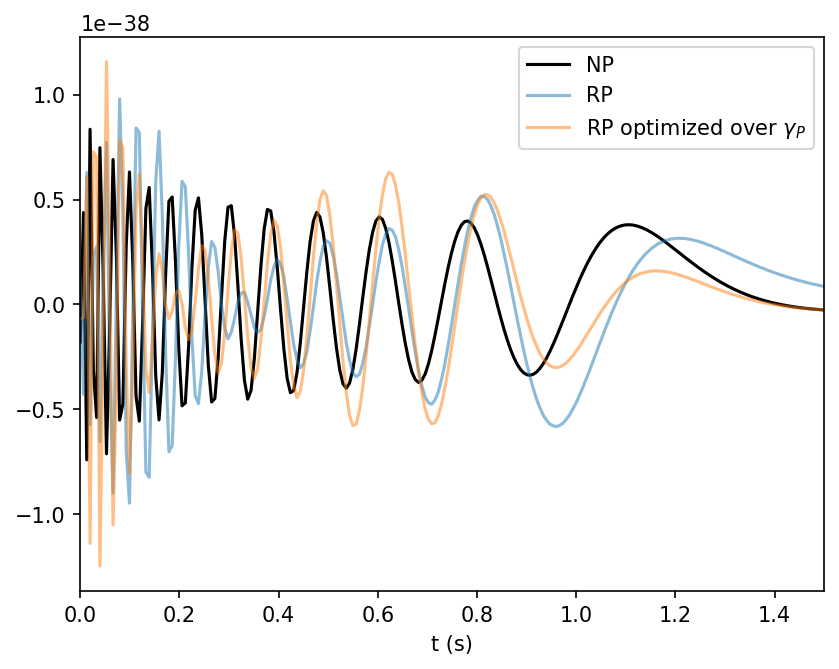

In [17]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)
h_NP = get_gw(NP_params)["waveform"].to_timeseries()

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 0
h_RP_before = get_gw(RP_params)["waveform"].to_timeseries()

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
h_RP_after = get_gw(RP_params)["waveform"].to_timeseries()

plt.plot(h_NP.sample_times, h_NP, label="NP", c="k")
plt.plot(h_RP_before.sample_times, h_RP_before, label="RP", alpha=0.5)
plt.plot(
    h_RP_after.sample_times,
    h_RP_after,
    label=r"RP optimized over $\gamma_P$",
    alpha=0.5,
)
plt.xlabel("t (s)")
plt.xlim(0, 1.5)

plt.legend()

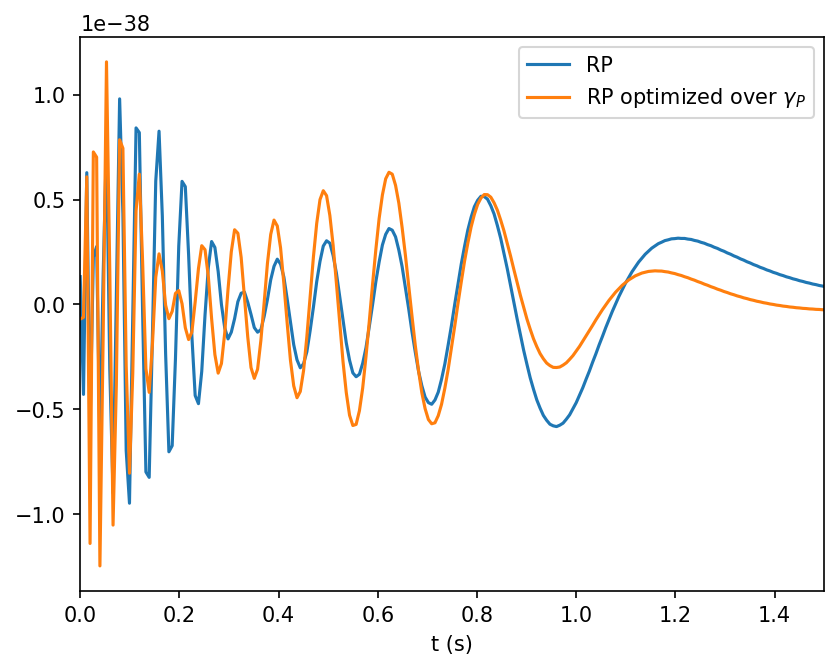

In [19]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 0
h_RP_before = get_gw(RP_params)["waveform"].to_timeseries()

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
h_RP_after = get_gw(RP_params)["waveform"].to_timeseries()

plt.plot(h_RP_before.sample_times, h_RP_before, label="RP")
plt.plot(h_RP_after.sample_times, h_RP_after, label=r"RP optimized over $\gamma_P$")
plt.xlabel("t (s)")
plt.xlim(0, 1.5)

plt.legend()

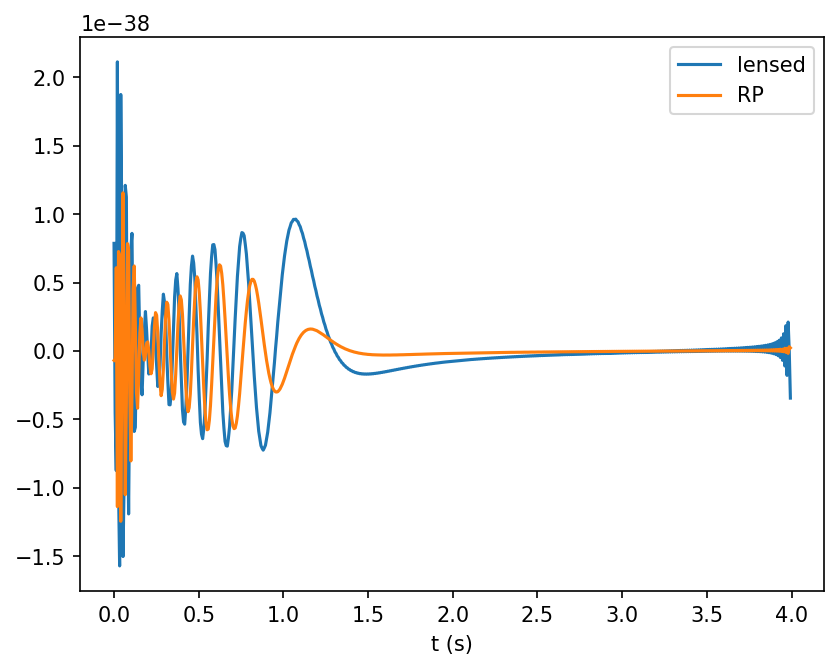

In [6]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783

h_lens = get_gw(lens_params)["waveform"].to_timeseries()
h_RP = get_gw(RP_params)["waveform"].to_timeseries()

plt.plot(h_lens.sample_times, h_lens, label="lensed")
plt.plot(h_RP.sample_times, h_RP, label="RP")
plt.xlabel("t (s)")

plt.legend()

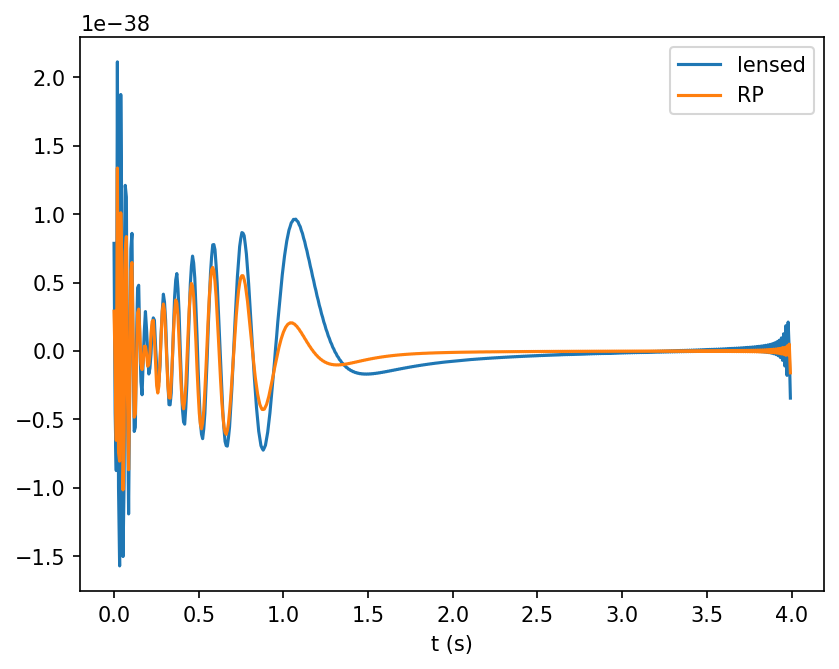

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = (1 - 0.235) * delta_t
RP_params["phi_c"] = -0.9021164653664865

h_lens = get_gw(lens_params)["waveform"].to_timeseries()
h_RP = get_gw(RP_params)["waveform"].to_timeseries()

plt.plot(h_lens.sample_times, h_lens, label="lensed")
plt.plot(h_RP.sample_times, h_RP, label="RP")
plt.xlabel("t (s)")

plt.legend()

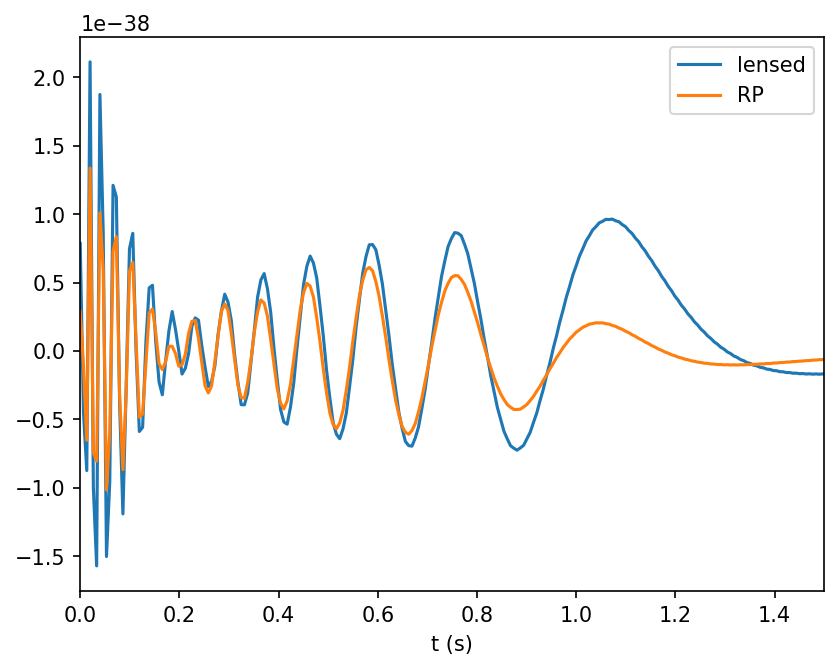

In [ ]:
plt.plot(h_lens.sample_times, h_lens, label="lensed")
plt.plot(h_RP.sample_times, h_RP, label="RP")
plt.xlim(0, 1.5)
plt.xlabel("t (s)")
plt.legend()

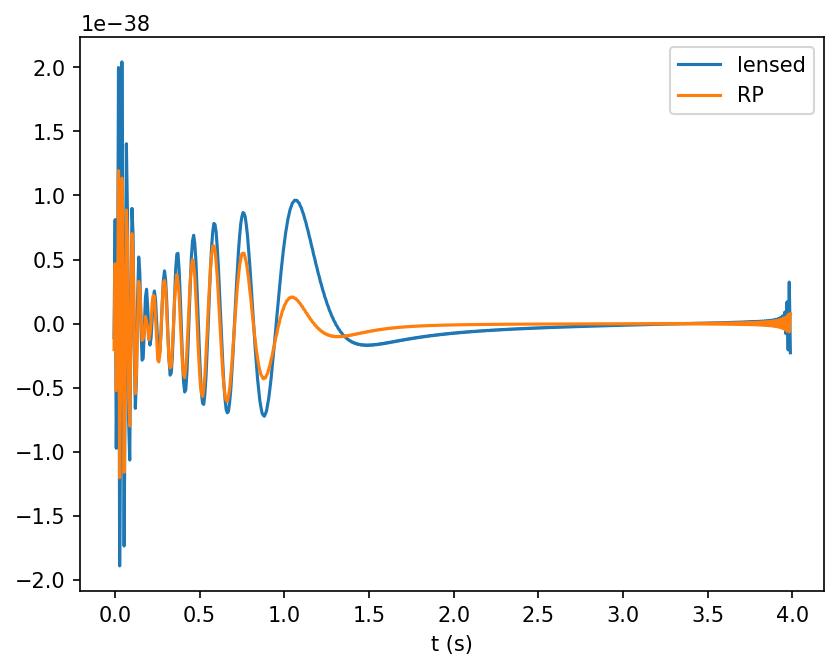

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = (1 - 0.235) * delta_t
RP_params["phi_c"] = -0.9021164653664865

time_shift = (1 - 0.235) * delta_t
h_lens = get_gw(lens_params)["waveform"].to_timeseries().cyclic_time_shift(time_shift)
h_RP = get_gw(RP_params)["waveform"].to_timeseries().cyclic_time_shift(time_shift)

plt.plot(h_lens.sample_times, h_lens, label="lensed")
plt.plot(h_RP.sample_times, h_RP, label="RP")
plt.xlabel("t (s)")

plt.legend()

In [ ]:
h_lens = np.abs(get_gw(lens_params)["waveform"]).to_timeseries()
h_RP = np.abs(get_gw(RP_params)["waveform"]).to_timeseries()

plt.plot(h_lens.sample_times, h_lens, label="lensed")
plt.plot(h_RP.sample_times, h_RP, label="RP")

plt.legend()

TypeError: to_timeseries does not support real types

In [ ]:
print(h_lens.sample_times.shape)
time_shift = match(h_lens, h_RP, return_phase=True)[1] * h_RP.delta_t
print(time_shift)

0.006622516556291391


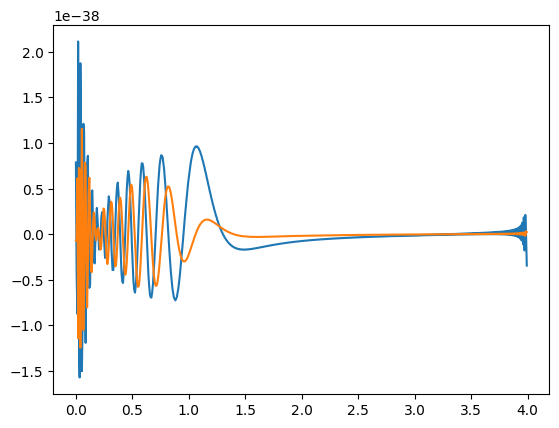

In [ ]:
h_lens = get_gw(lens_params)["waveform"].to_timeseries()
h_RP = get_gw(RP_params)["waveform"].to_timeseries()

plt.plot(h_lens.sample_times, h_lens)
plt.plot(h_RP.sample_times, h_RP)

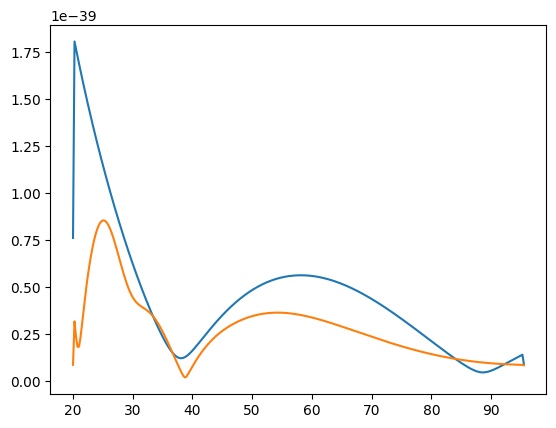

In [ ]:
h_lens = get_gw(lens_params)["waveform"].to_timeseries().to_frequencyseries()
h_RP = get_gw(RP_params)["waveform"].to_timeseries().to_frequencyseries()

plt.plot(20 + h_lens.sample_frequencies, np.abs(h_lens))
plt.plot(20 + h_RP.sample_frequencies, np.abs(h_RP))

## PyCBC TimeSeries Class methods

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

mcz_durations = np.array([])
mcz_arr = np.linspace(10, 90, 10)
for mcz in mcz_arr:
    RP_params["mcz"] = mcz * solar_mass
    h_RP = get_gw(RP_params)["waveform"]
    mcz_durations = np.append(mcz_durations, h_RP.duration)
print(mcz_durations)

omega_tilde_durations = np.array([])
omega_tilde_arr = np.linspace(1, 3, 10)
for omega_tilde in omega_tilde_arr:
    RP_params["omega_tilde"] = omega_tilde
    h_RP = get_gw(RP_params)["waveform"]
    omega_tilde_durations = np.append(omega_tilde_durations, h_RP.duration)
print(omega_tilde_durations)

theta_tilde_durations = np.array([])
theta_tilde_arr = np.linspace(1, 8, 10)
for theta_tilde in theta_tilde_arr:
    RP_params["theta_tilde"] = theta_tilde
    h_RP = get_gw(RP_params)["waveform"]
    theta_tilde_durations = np.append(theta_tilde_durations, h_RP.duration)
print(theta_tilde_durations)

gamma_P_durations = np.array([])
gamma_P_arr = np.linspace(0, 2 * np.pi, 10)
for gamma_P in gamma_P_arr:
    RP_params["gamma_P"] = gamma_P
    h_RP = get_gw(RP_params)["waveform"]
    gamma_P_durations = np.append(gamma_P_durations, h_RP.duration)
print(gamma_P_durations)

MLz_durations = np.array([])
MLz_arr = np.linspace(1e3, 1e4, 10)
for MLz in MLz_arr:
    lens_params["MLz"] = MLz * solar_mass
    h_L = get_gw(lens_params)["waveform"]
    MLz_durations = np.append(MLz_durations, h_L.duration)
print(MLz_durations)

y_durations = np.array([])
y_arr = np.linspace(0.5, 4, 10)
for y in y_arr:
    lens_params["y"] = y
    h_L = get_gw(lens_params)["waveform"]
    y_durations = np.append(y_durations, h_L.duration)
print(y_durations)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


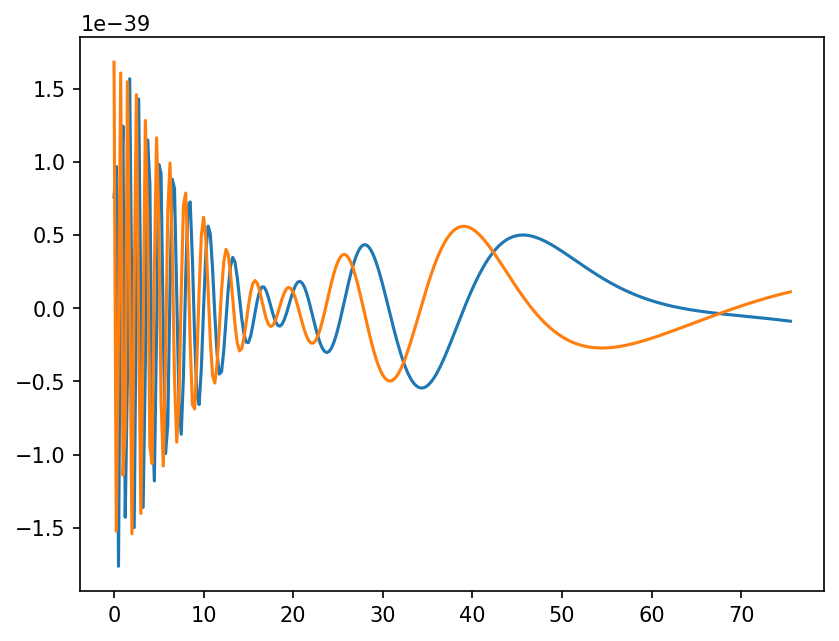

<Swig Object of type 'tagREAL8TimeSeries *' at 0x159be21f0>


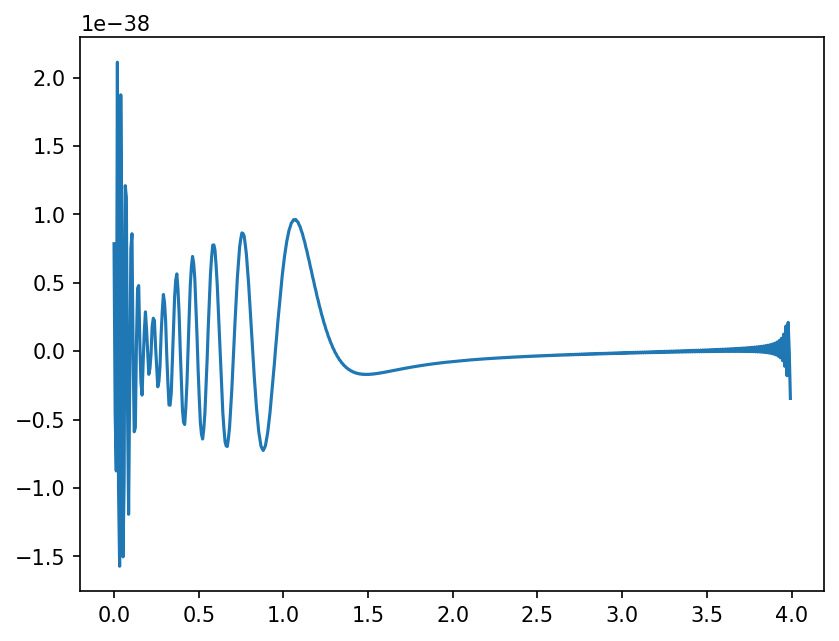

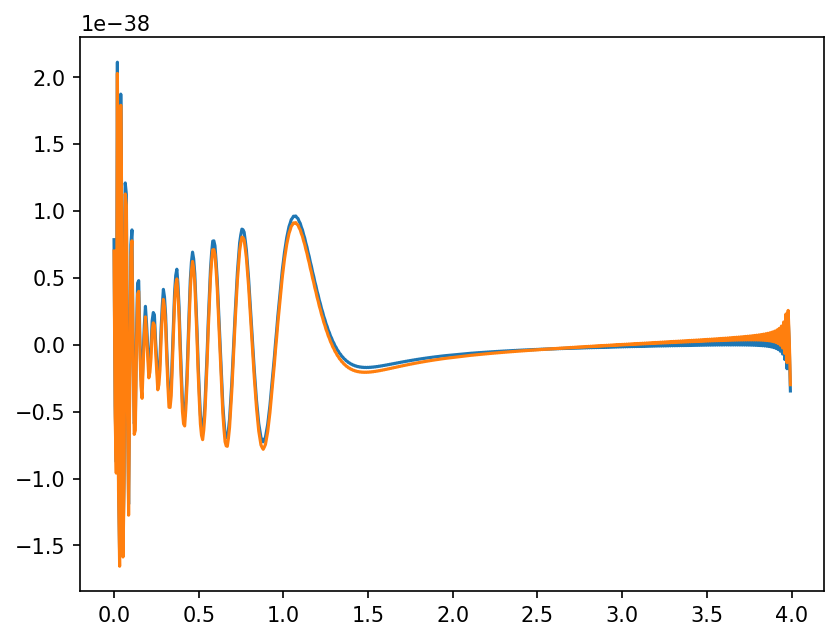

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

h_L = get_gw(lens_params)["waveform"]
h_L.plot()
plt.show()

ts_L = h_L.to_timeseries()
print(ts_L.lal())
ts_L.plot()
plt.show()

plt.plot(ts_L.sample_times, ts_L)
plt.plot(ts_L.sample_times, ts_L.detrend())
plt.show()

## TimeSeries of different chirp masses

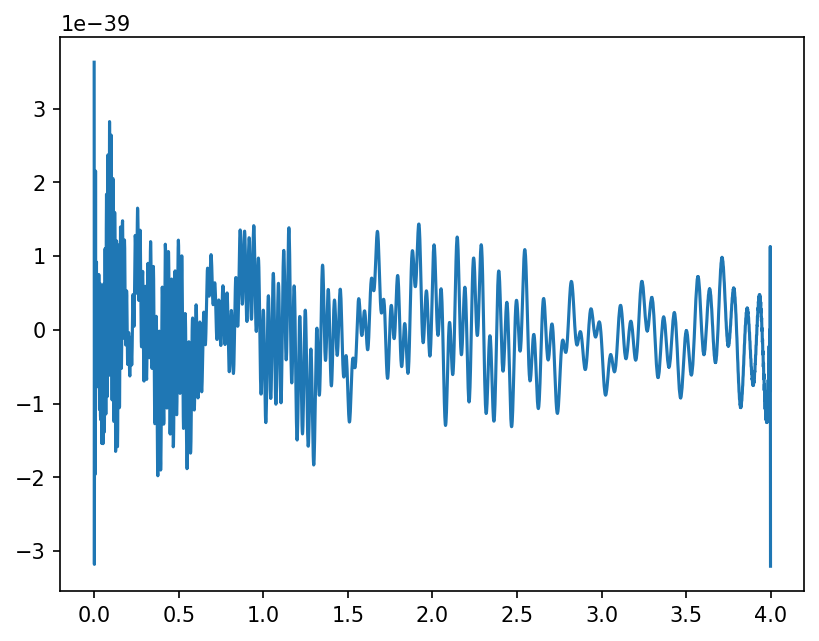

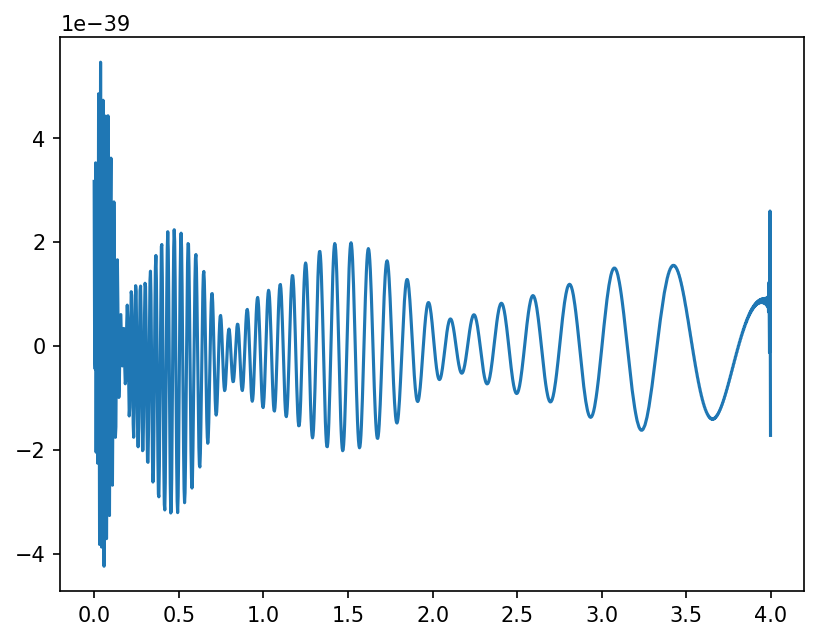

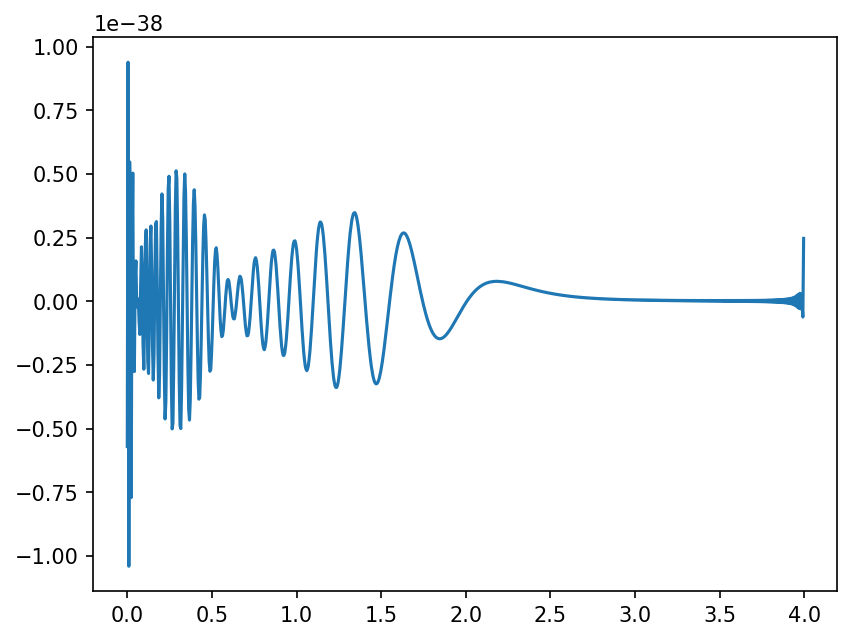

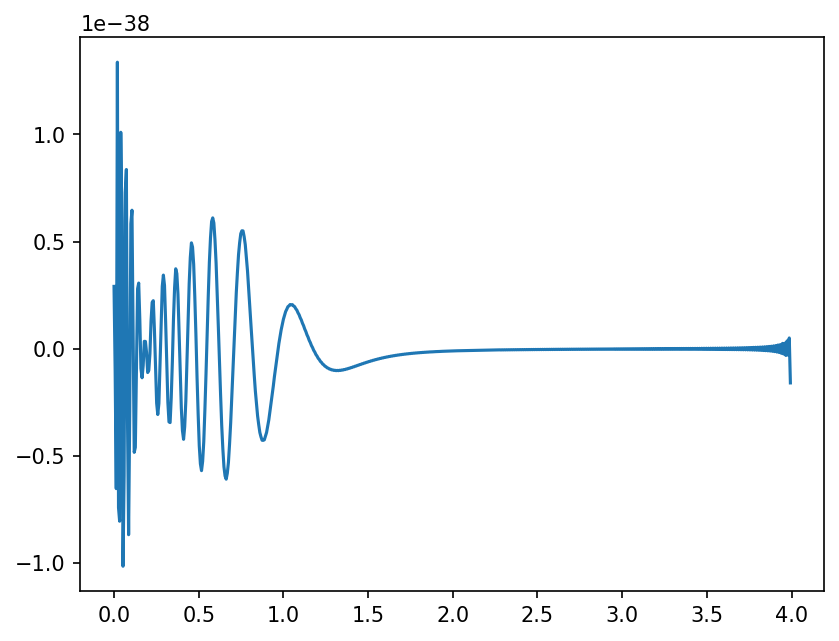

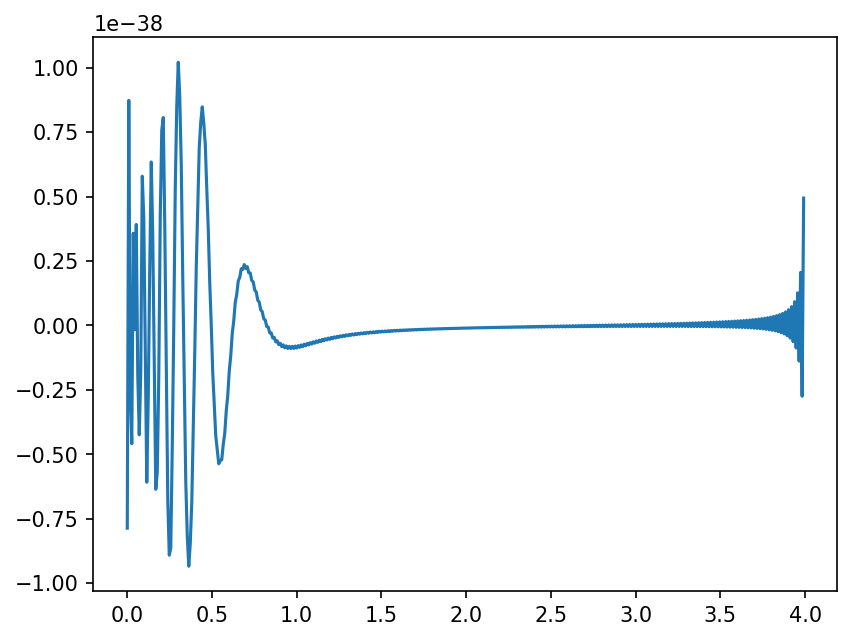

In [ ]:
# change mcz in RP_params from 20 to 60 with increment of 5, get each waveform and convert to TimeSeries, then plot them individually in each plot
mcz_arr = np.arange(5, 30, 5)
for mcz in mcz_arr:
    RP_params["mcz"] = mcz * solar_mass
    ts_RP = get_gw(RP_params)["waveform"].to_timeseries()
    plt.plot(ts_RP.sample_times, ts_RP)
    plt.show()

{'ep_min': 0.04831009361687233, 'ep_min_gamma': 4.950388423838462, 'ep_min_idx': 0.00495526320007756, 'ep_min_phi': 1.6191526536458746e-08, 'ep_max': 0.5271206283179197, 'ep_max_gamma': 2.792526803190927, 'ep_max_idx': -0.43919918743606345, 'ep_max_phi': 0.1910954088444428, 'ep_0': 0.2571867060506603, 'ep_0_ind': -0.3526353163255407, 'ep_0_phi': 0.6197505873386198}


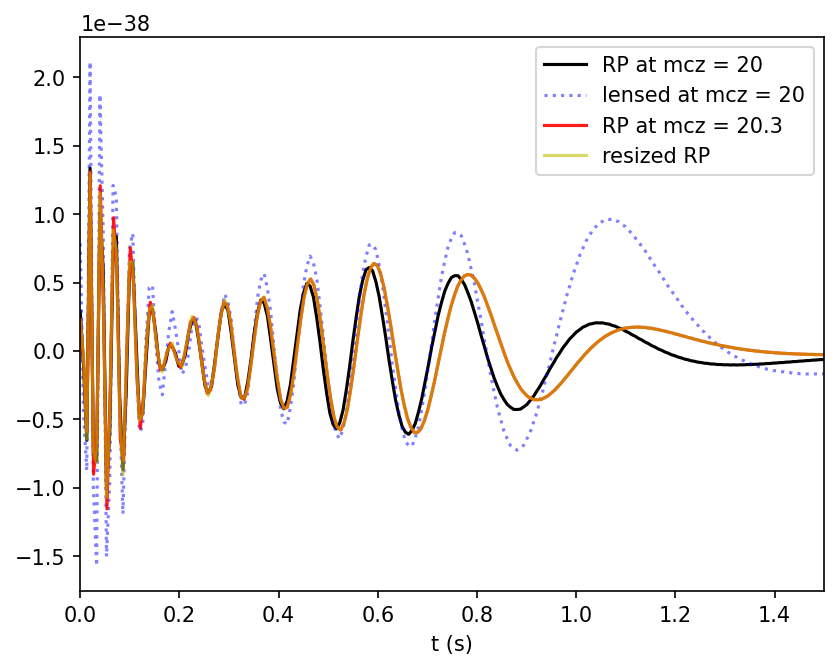

In [ ]:
# using resize to make the length of two FrequencySeries the same

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = (1 - 0.235) * delta_t
RP_params["phi_c"] = -0.9021164653664865

h_RP = get_gw(RP_params)["waveform"].to_timeseries()
plt.plot(
    h_RP.sample_times,
    h_RP,
    label="RP at mcz = {:.3g}".format(RP_params["mcz"] / solar_mass),
    c="black",
)

# plot TimeSeries of different chirp masses
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["mcz"] = 20.3 * solar_mass
lens_params["mcz"] = 20 * solar_mass

# vec1 = get_gw(RP_params)["waveform"]
# vec2 = get_gw(lens_params)["waveform"]

# print("delta_t of vec1 and vec2:", vec1.delta_t, vec2.delta_t)

# vec1.resize(len(vec2))
# delta_t = vec1.delta_t
# print("after resizing vec1:", delta_t)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.950388423838462
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = 0.29434338950070055 * delta_t
RP_params["phi_c"] = -2.4579973567785487

print(
    optimize_mismatch_gammaP_general(RP_params, lens_params, use_optimized_match=True)
)

vec1 = get_gw(RP_params)["waveform"]
vec2 = get_gw(lens_params)["waveform"]

ts1 = vec1.to_timeseries()
ts2 = vec2.to_timeseries()

plt.plot(
    ts2.sample_times,
    ts2,
    "b:",
    label="lensed at mcz = {:.3g}".format(lens_params["mcz"] / solar_mass),
    alpha=0.5,
)
plt.plot(
    ts1.sample_times,
    ts1,
    label="RP at mcz = {:.3g}".format(RP_params["mcz"] / solar_mass),
    c="r",
    alpha=0.9,
)

vec1 = get_gw(RP_params)["waveform"]
vec2 = get_gw(lens_params)["waveform"]
vec1.resize(len(vec2))
ts1 = vec1.to_timeseries()
plt.plot(ts1.sample_times, ts1, "y", label="resized RP", alpha=0.6)

plt.xlabel("t (s)")
plt.xlim(0, 1.5)
plt.legend()

{'ep_min': 0.048623836465222725, 'ep_min_gamma': 4.950388423838462, 'ep_min_idx': 0.0045305850328078295, 'ep_min_phi': 1.6960295894023012e-09, 'ep_max': 0.5394785590283562, 'ep_max_gamma': 2.792526803190927, 'ep_max_idx': -0.3664917364878604, 'ep_max_phi': 0.05137681739272959, 'ep_0': 0.26270657652727203, 'ep_0_ind': -0.3352348019466935, 'ep_0_phi': 0.5931383721263075}


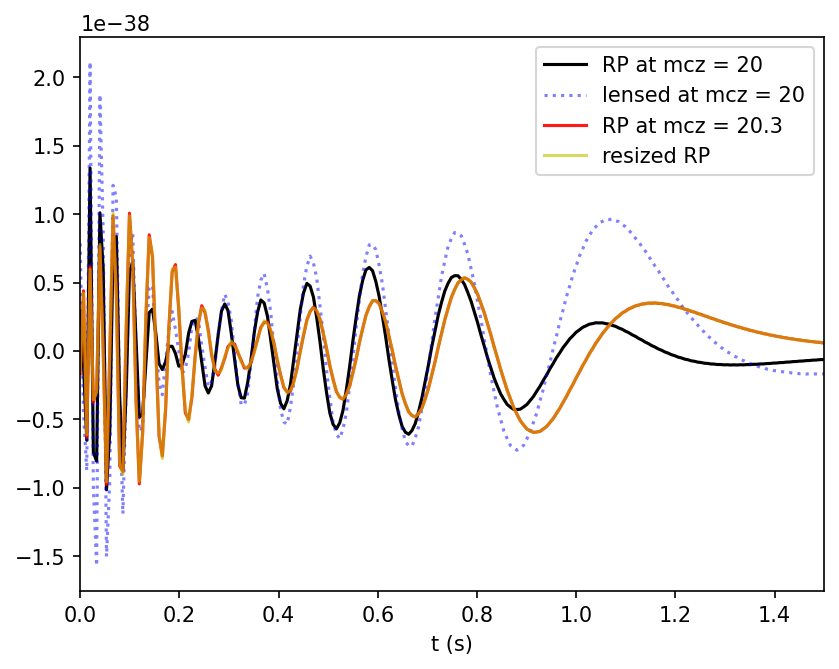

In [ ]:
# applying f_range of source to create FrequencySeries of RP template

lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.823455387329783
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = (1 - 0.235) * delta_t
RP_params["phi_c"] = -0.9021164653664865

h_RP = get_gw(RP_params)["waveform"].to_timeseries()
plt.plot(
    h_RP.sample_times,
    h_RP,
    label="RP at mcz = {:.3g}".format(RP_params["mcz"] / solar_mass),
    c="black",
)

# plot TimeSeries of different chirp masses
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["mcz"] = 20.3 * solar_mass
lens_params["mcz"] = 20 * solar_mass

# vec1 = get_gw(RP_params)["waveform"]
# vec2 = get_gw(lens_params)["waveform"]

# print("delta_t of vec1 and vec2:", vec1.delta_t, vec2.delta_t)

# vec1.resize(len(vec2))
# delta_t = vec1.delta_t
# print("after resizing vec1:", delta_t)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.950388423838462
delta_t = get_gw(RP_params)["waveform"].delta_t
RP_params["t_c"] = 0.269115030762646 * delta_t
RP_params["phi_c"] = -2.5185802884378057

print(
    optimize_mismatch_gammaP_general(
        "RP & L", lens_params, RP_params, NP_params, use_optimized_match=True
    )
)

vec2 = get_gw(lens_params)["waveform"]
f_range = get_gw(lens_params)["f_range"]
vec1 = Precessing(RP_params).strain(f_range)

ts1 = vec1.to_timeseries()
ts2 = vec2.to_timeseries()

plt.plot(
    ts2.sample_times,
    ts2,
    "b:",
    label="lensed at mcz = {:.3g}".format(lens_params["mcz"] / solar_mass),
    alpha=0.5,
)
plt.plot(
    ts1.sample_times,
    ts1,
    label="RP at mcz = {:.3g}".format(RP_params["mcz"] / solar_mass),
    c="r",
    alpha=0.9,
)

vec1 = get_gw(RP_params)["waveform"]
vec2 = get_gw(lens_params)["waveform"]
vec1.resize(len(vec2))
ts1 = vec1.to_timeseries()
plt.plot(ts1.sample_times, ts1, "y", label="resized RP", alpha=0.6)

plt.xlabel("t (s)")
plt.xlim(0, 1.5)
plt.legend()

## TimeSeries of different effects & strain amplitudes

(0.9266115164499805, 0.1288189359895544, -0.9640450513998393)
(0.9266115164499806, 0.12881893956817464, -0.9640450538001858)
(0.9266115164499806, 0.12881893956817464, -0.9640450538001858)


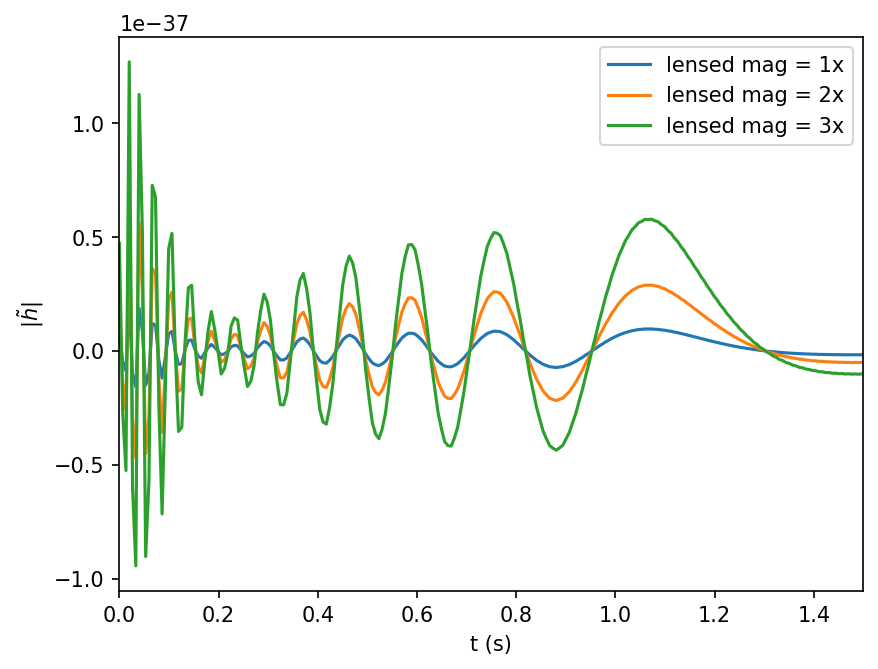

In [11]:
vec0 = get_gw(RP_params)["waveform"]
vec1 = get_gw(lens_params)["waveform"]
vec2 = get_gw(lens_params)["waveform"] * 3
vec3 = get_gw(lens_params)["waveform"] * 6

print(optimized_match(vec0, vec1, return_phase=True))
print(optimized_match(vec0, vec2, return_phase=True))
print(optimized_match(vec0, vec3, return_phase=True))

ts1 = vec1.to_timeseries()
ts2 = vec2.to_timeseries()
ts3 = vec3.to_timeseries()

plt.plot(ts1.sample_times, ts1, label="lensed mag = 1x")
plt.plot(ts2.sample_times, ts2, label="lensed mag = 2x")
plt.plot(ts3.sample_times, ts3, label="lensed mag = 3x")

plt.xlabel("t (s)")
plt.xlim(0, 1.5)
plt.ylabel(r"$|\tilde{h}|$")
plt.legend()

(0.8317961731950857, 0.342672948994452, -1.2381588263412797)
(1.0000000000000002, 6.622692766460742e-09, -0.661993701417841)
(0.9422766091788436, 0.22416479234155418, -0.22213657080817803)


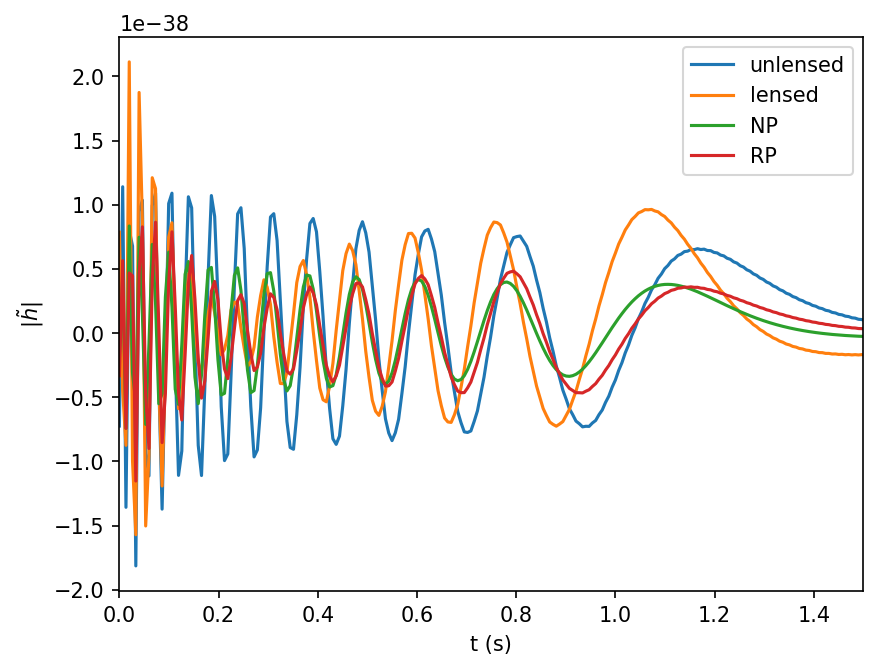

In [23]:
unlens_params = lens_params.copy()
unlens_params["MLz"] = 0

vec0 = get_gw(unlens_params)["waveform"]
vec1 = get_gw(lens_params)["waveform"]
vec2 = get_gw(NP_params)["waveform"]
vec3 = get_gw(RP_params)["waveform"]

print(optimized_match(vec0, vec1, return_phase=True))
print(optimized_match(vec0, vec2, return_phase=True))
print(optimized_match(vec0, vec3, return_phase=True))

ts0 = vec0.to_timeseries()
ts1 = vec1.to_timeseries()
ts2 = vec2.to_timeseries()
ts3 = vec3.to_timeseries()

plt.plot(ts0.sample_times, ts0, label="unlensed")
plt.plot(ts1.sample_times, ts1, label="lensed")
plt.plot(ts2.sample_times, ts2, label="NP")
plt.plot(ts3.sample_times, ts3, label="RP")

plt.xlabel("t (s)")
plt.xlim(0, 1.5)
plt.ylabel(r"$|\tilde{h}|$")
plt.legend()

(1.0, -3.2481572118230377e-09, -3.6943304447502123e-06)
(0.9999999999999998, 7.278523448517062e-09, -3.701888736849708e-06)


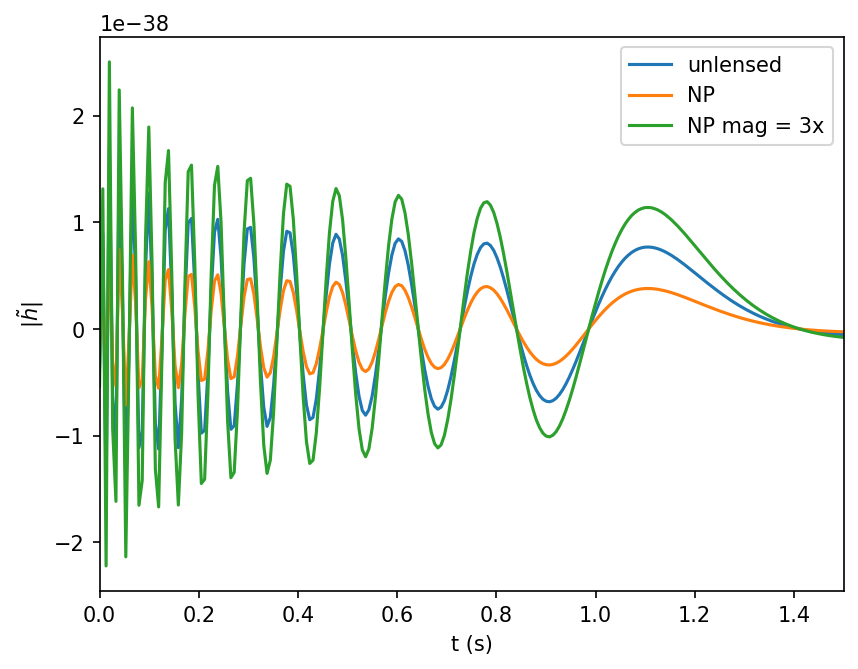

In [22]:
unlens_params = lens_params.copy()
unlens_params["MLz"] = 0
unlens_params["phi_c"] = -0.66199

vec0 = get_gw(unlens_params)["waveform"]
vec1 = get_gw(NP_params)["waveform"]
vec2 = get_gw(NP_params)["waveform"] * 3

print(optimized_match(vec0, vec1, return_phase=True))
print(optimized_match(vec0, vec2, return_phase=True))

ts0 = vec0.to_timeseries()
ts1 = vec1.to_timeseries()
ts2 = vec2.to_timeseries()

plt.plot(ts0.sample_times, ts0, label="unlensed")
plt.plot(ts1.sample_times, ts1, label="NP")
plt.plot(ts2.sample_times, ts2, label="NP mag = 3x")

plt.xlabel("t (s)")
plt.xlim(0, 1.5)
plt.ylabel(r"$|\tilde{h}|$")
plt.legend()

# waveform comparison

In [95]:
def find_optimized_params(t_params, s_params, opt_match=True):
    gammaP_results = optimize_mismatch_gammaP_general(
        t_params, s_params, use_optimized_match=opt_match
    )

    t_params["gamma_P"] = gammaP_results["ep_min_gamma"]
    ep_min_idx = gammaP_results["ep_min_idx"]

    delta_t = get_gw(s_params)["waveform"].delta_t
    t_params["t_c"] = t_params["t_c"] - ep_min_idx * delta_t

    mismatch_results1 = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )
    # testing
    updated_idx = mismatch_results1["index"]  # testing
    t_params["t_c"] = t_params["t_c"] - updated_idx * delta_t  # testing

    mismatch_results2 = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )  # testing
    phi = mismatch_results2["phi"]  # testing
    t_params["phi_c"] = phi

    updated_mismatch_results = mismatch_general(
        t_params, s_params, use_optimized_match=opt_match
    )

    return {
        "updated_t_params": t_params,
        "updated_s_params": s_params,
        "updated_mismatch_results": updated_mismatch_results,
    }

In [96]:
from scipy.signal import argrelextrema


def waveform_comparison(t_params, s_params, opt_match=True):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    updated_params = find_optimized_params(t_params, s_params, opt_match)
    t_params = updated_params["updated_t_params"]
    s_params = updated_params["updated_s_params"]
    epsilon = updated_params["updated_mismatch_results"]["mismatch"]
    idx = updated_params["updated_mismatch_results"]["index"]
    phi = updated_params["updated_mismatch_results"]["phi"]

    # template waveform
    t_gw = get_gw(t_params)
    t_phase = t_gw["phase"]

    axes[0].plot(
        t_gw["f_range"],
        np.abs(t_gw["waveform"]),
        label="template",
        color="black",
        linestyle="-",
    )

    # source waveform
    s_gw = get_gw(s_params)
    s_phase = s_gw["phase"]

    axes[0].plot(
        s_gw["f_range"],
        np.abs(s_gw["waveform"]),
        label="source",
        color="black",
        linestyle="--",
    )

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    phase_diff = s_phase - t_phase
    # phase_diff = np.unwrap(phase_diff - phase_diff[0])
    phase_diff = np.unwrap(phase_diff)

    axes[1].plot(s_gw["f_range"], phase_diff, color="black", linestyle="-")

    # get Delta t_d and I
    lens_inst = LensingGeo(s_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    delta_t = t_gw["waveform"].delta_t
    t_c = idx * delta_t
    f_cut = lens_inst.f_cut()

    # plot one cycle
    f_cut_1cycle = 1 / Delta_td + 20
    if f_cut_1cycle > f_cut:
        f_cut_1cycle = f_cut
    f_1cycle = np.arange(20, f_cut_1cycle, 0.25)
    s_gw_1cycle = np.abs(s_gw["waveform"][s_gw["f_range"] <= f_cut_1cycle])
    phase_diff_1cycle = phase_diff[s_gw["f_range"] <= f_cut_1cycle]
    # Find peaks
    strain_peaks_idx = argrelextrema(s_gw_1cycle, np.greater)[0]
    phase_diff_peaks_idx = argrelextrema(phase_diff_1cycle, np.greater)[0]
    # Find troughs
    strain_troughs_idx = argrelextrema(s_gw_1cycle, np.less)[0]
    phase_diff_troughs_idx = argrelextrema(phase_diff_1cycle, np.less)[0]
    # Find inflection points
    # Calculate first derivative
    strain_first_derivative = np.gradient(s_gw_1cycle)
    phase_diff_first_derivative = np.gradient(phase_diff_1cycle)
    # Calculate second derivative
    strain_second_derivative = np.gradient(strain_first_derivative)
    phase_diff_second_derivative = np.gradient(phase_diff_first_derivative)
    # Find where the second derivative changes sign
    strain_inflections_idx = np.where(np.diff(np.sign(strain_second_derivative)))[0]
    phase_diff_inflections_idx = np.where(
        np.diff(np.sign(phase_diff_second_derivative))
    )[0]

    # plot s_gw_1cycle["waveform"] and the peak, trough, and inflection point as red dots
    axes[0].plot(f_1cycle, s_gw_1cycle, "r--", label="1 cycle of lensed")
    axes[0].plot(f_1cycle[strain_peaks_idx], s_gw_1cycle[strain_peaks_idx], "r*")
    axes[0].plot(f_1cycle[strain_troughs_idx], s_gw_1cycle[strain_troughs_idx], "r*")
    axes[0].plot(
        f_1cycle[strain_inflections_idx], s_gw_1cycle[strain_inflections_idx], "r*"
    )
    axes[0].legend()

    axes[1].plot(f_1cycle, phase_diff_1cycle, "r-")
    axes[1].plot(
        f_1cycle[phase_diff_peaks_idx],
        phase_diff_1cycle[phase_diff_peaks_idx],
        "r*",
        label="peak",
    )
    axes[1].plot(
        f_1cycle[phase_diff_troughs_idx],
        phase_diff_1cycle[phase_diff_troughs_idx],
        "r*",
        label="trough",
    )
    axes[1].plot(
        f_1cycle[phase_diff_inflections_idx],
        phase_diff_1cycle[phase_diff_inflections_idx],
        "r*",
        label="inflection",
    )
    ############################################################################################################

    fig.suptitle(
        r"$\Delta t_d$ = {:.3g} s, $I$ = {:.3g}, $\epsilon = {:.3g}$, idx = {:.3g}, $\phi_c$ = {:.3g}".format(
            Delta_td, I, epsilon, idx, phi
        ),
        fontsize=24,
        y=1.02,
    )

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{\rm s} - \Phi_{\rm t}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

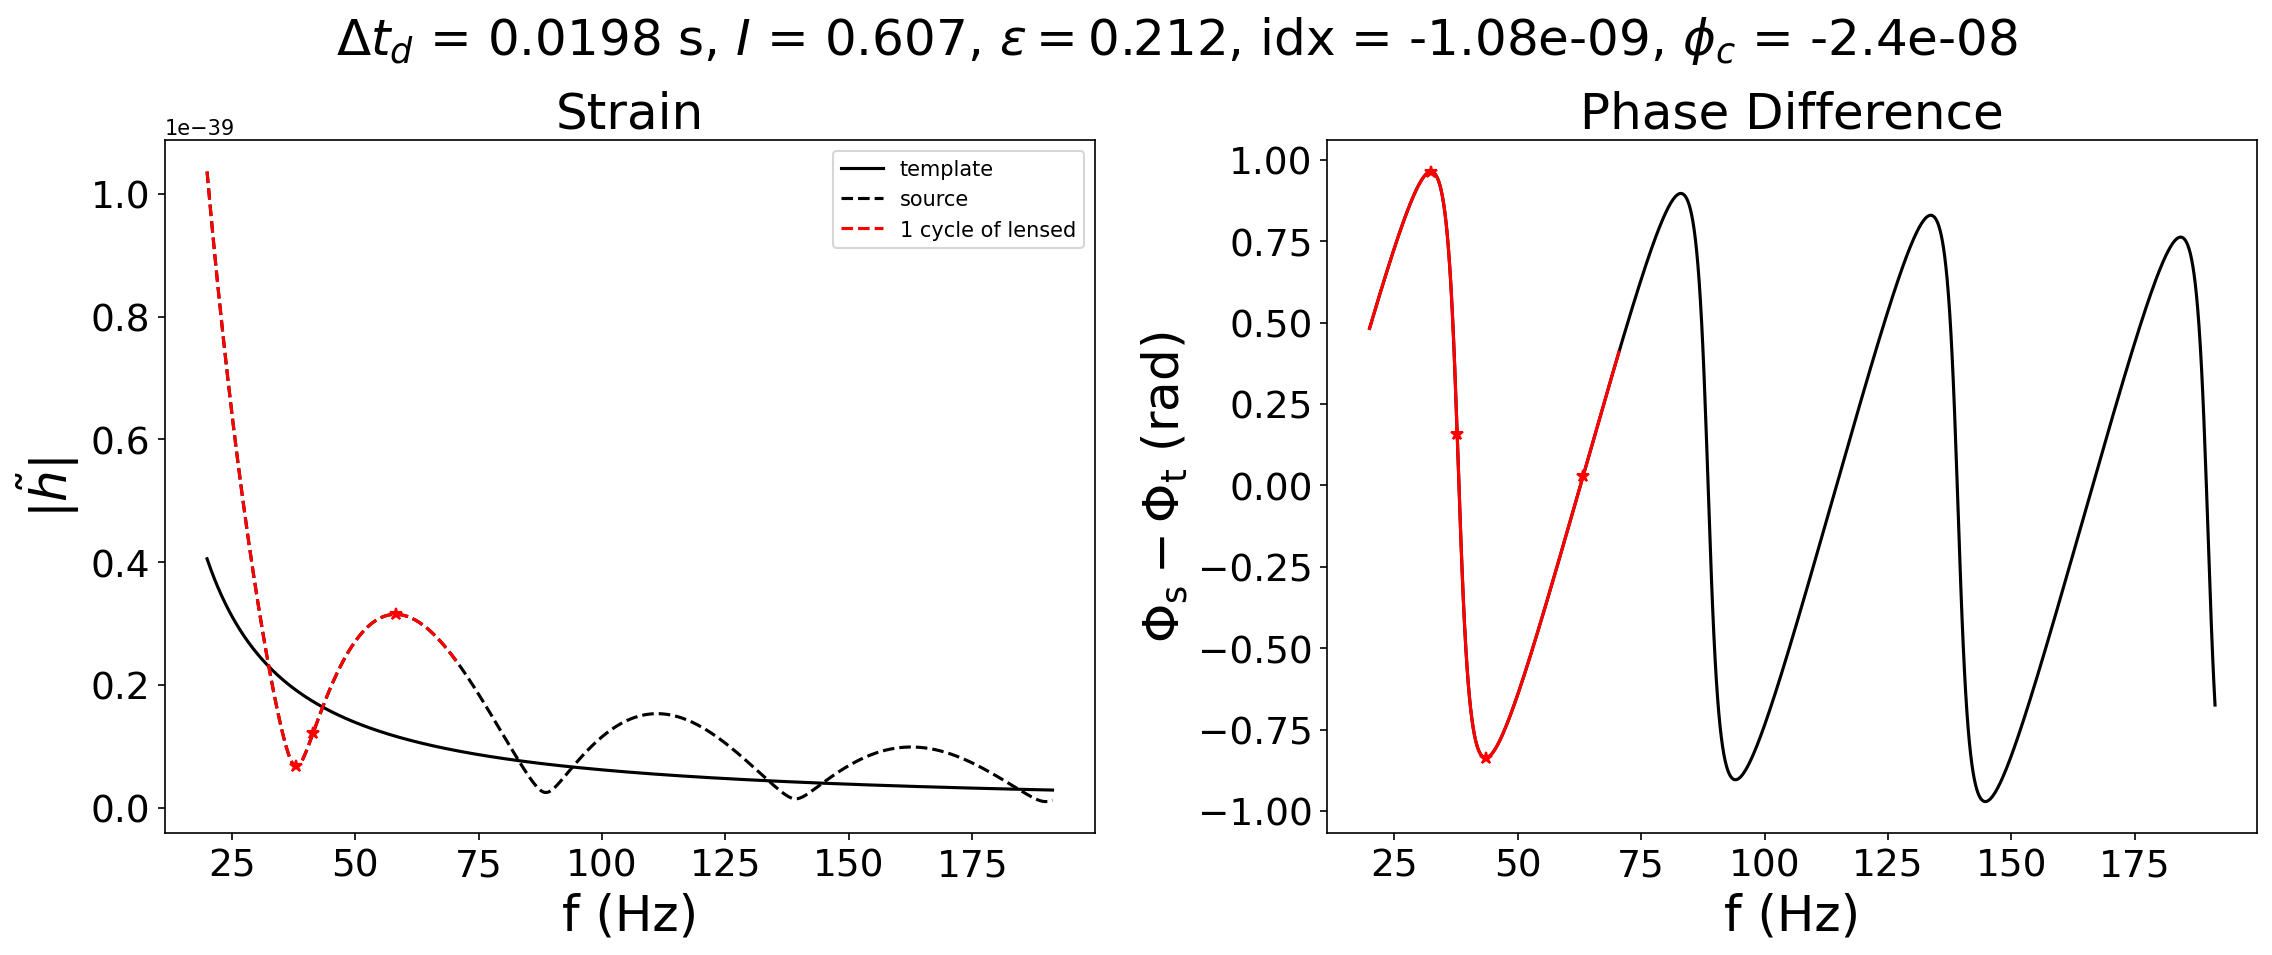

In [98]:
# testing

lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)

lens_params["MLz"] = 2000 * solar_mass
lens_params["mcz"] = NP_params["mcz"] = 10 * solar_mass

waveform_comparison(NP_params, lens_params, opt_match=True)

In [14]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 2000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)


interact(
    waveform_comparison_slider, mcz=ipywidgets.FloatSlider(min=10, max=90, step=0.5)
)

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>